In [56]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import anndata as ad
import matplotlib.patheffects as pe
import warnings
from scipy import sparse
import pickle
import matplotlib.patches as patches
from PIL import Image

In [57]:
from tqdm import tqdm

In [58]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import seaborn as sns
import textwrap

In [60]:
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
mpl.rcParams.update(new_rc_params)
plt.rcParams.update({'axes.labelsize' : 16}) 

In [61]:
biological_types = ["1_W3L1",
                    "2_W3D1",
                    "3_F-mini-ON",
                    "4_F-mini-OFF",
                    "5_J-RGC",
                    "6_W3B",
                    "7_Novel",
                    "8_Novel",
                    "9_Tbr1-Novel",
                    "10_ooDSGC",
                    "11_Novel",
                    "12_N-ooDSGC",
                    "13_W3L2",
                    "14_Novel",
                    "15_Novel",
                    "16_D/V-ooDSGC",
                    "17_Tbr1-S1",
                    "18_Novel",
                    "19_Novel",
                    "20_Novel",
                    "21_Tbr1-S2",
                    "22_MX",
                    "23_W3D2",
                    "24_ooDSGC",
                    "25_Novel",
                    "26_Novel",
                    "27_Novel",
                    "28_F-midi-OFF",
                    "29_Novel",
                    "30_W3D3",
                    "31_M2",
                    "32_F-Novel",
                    "33_M1",
                    "34_Novel",
                    "35_Novel",
                    "36_Novel",
                    "37_Novel",
                    "38_F-midi-ON",
                    "39_Novel",
                    "40_M1-duplicate",
                    "41_alphaON-T",
                    "42_alphaOFF-S",
                    "43_alphaON-S/M4",
                    "44_Novel",
                    "45_alphaOFF-T"
]

In [65]:
def make_type_scatter(fold_changes_1, fold_changes_2, blacklists, xlabel, ylabel, figname, DE_genes_x_up, DE_genes_x_down, DE_genes_y_up, DE_genes_y_down, xlims=(-6,6), ylims=(-6,6), LFC_thresh=2, test_genes=[], title='', colors=['#2171b5', '#cb181d', '#ff7f0e', '#2ca02c']):
    def hex_to_rgb(value):
        value = value.lstrip('#')
        lv = len(value)
        return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))
    
    def rgb_to_hex(rgb):
        return '#' + '%02x%02x%02x' % rgb
    
    def mean_color(color1, color2):
        rgb1 = hex_to_rgb(color1)
        rgb2 = hex_to_rgb(color2)
    
        avg = lambda x, y: round((x+y) / 2)
    
        new_rgb = ()
    
        for i in range(len(rgb1)):
            new_rgb += (avg(rgb1[i], rgb2[i]),)
           
        return rgb_to_hex(new_rgb)

    # mixed_colors = [mean_color(colors[0], colors[2]),
    #                 mean_color(colors[0], colors[3]),
    #                 mean_color(colors[1], colors[2]),
    #                 mean_color(colors[1], colors[3])]
    mixed_colors = ['#BF40BF','#BF40BF','#BF40BF','#BF40BF']
    
    #start from top left and move right then down, like reading
    square_counts = [0,0,0,0,0,0,0,0,0]
    x_up_counts = [0,0,0]
    x_down_counts = [0,0,0]
    y_up_counts = [0,0,0]
    y_down_counts = [0,0,0]
    x_up_over_y_counts = [0,0]
    x_down_over_y_counts = [0,0]
    for x in tqdm(range(len(fold_changes_1))):
        blacklist = [i for j in blacklists for i in j[x]]
        x_FC = [fold_changes_1[x][i] for i in range(len(fold_changes_1[x])) if i not in blacklist]
        y_FC = [fold_changes_2[x][i] for i in range(len(fold_changes_2[x])) if i not in blacklist]
        
        for i in range(len(x_FC)):
            square_index_1 = 0
            square_index_2 = 0
            if np.log2(y_FC[i]) >= LFC_thresh:
                square_index_1 = 0
            elif np.log2(y_FC[i]) >= -LFC_thresh:
                square_index_1 = 3
            else:
                square_index_1 = 6
            
            if np.log2(x_FC[i]) <= -LFC_thresh:
                square_index_2 = 0
            elif np.log2(x_FC[i]) <= LFC_thresh:
                square_index_2 = 1
            else:
                square_index_2 = 2
            
            square_index = square_index_1+square_index_2
            square_counts[square_index] += 1
        
        plt.scatter(np.log2(x_FC), np.log2(y_FC), s=0.2, c='gray')
    for x in tqdm(range(len(DE_genes_x_up))):
        blacklist = [i for j in blacklists for i in j[x]]
        x_FC = []
        y_FC = []
        x_FC_over_y_up = []
        y_FC_over_y_up = []
        x_FC_over_y_down = []
        y_FC_over_y_down = []
        top_count = 0
        middle_count = 0
        bottom_count = 0
        top_count_over_y = 0
        bottom_count_over_y = 0
        for i in DE_genes_x_up[x]:
            gene_index = gene_names.index(i)
            if gene_index not in blacklist:
                if (i not in DE_genes_y_up[x]) and (i not in DE_genes_y_down[x]):
                    x_FC.append(fold_changes_1[x][gene_index])
                    y_FC.append(fold_changes_2[x][gene_index])
                    if np.log2(fold_changes_2[x][gene_index]) >= LFC_thresh:
                        top_count += 1
                    elif np.log2(fold_changes_2[x][gene_index]) <= -LFC_thresh:
                        bottom_count += 1
                    else:
                        middle_count += 1
                elif i in DE_genes_y_up[x]:
                    x_FC_over_y_up.append(fold_changes_1[x][gene_index])
                    y_FC_over_y_up.append(fold_changes_2[x][gene_index])
                    top_count_over_y += 1
                elif i in DE_genes_y_down[x]:
                    x_FC_over_y_down.append(fold_changes_1[x][gene_index])
                    y_FC_over_y_down.append(fold_changes_2[x][gene_index])
                    bottom_count_over_y += 1

        x_up_counts[0] += top_count
        x_up_counts[1] += middle_count
        x_up_counts[2] += bottom_count
        x_up_over_y_counts[0] += top_count_over_y
        x_up_over_y_counts[1] += bottom_count_over_y
        plt.scatter(np.log2(x_FC), np.log2(y_FC), s=0.2, c=colors[0])#'#2171b5')
        plt.scatter(np.log2(x_FC_over_y_up), np.log2(y_FC_over_y_up), s=0.2, c=mixed_colors[0])
        plt.scatter(np.log2(x_FC_over_y_down), np.log2(y_FC_over_y_down), s=0.2, c=mixed_colors[1])
    for x in tqdm(range(len(DE_genes_x_down))):
        blacklist = [i for j in blacklists for i in j[x]]
        x_FC = []
        y_FC = []
        x_FC_over_y_up = []
        y_FC_over_y_up = []
        x_FC_over_y_down = []
        y_FC_over_y_down = []
        top_count = 0
        middle_count = 0
        bottom_count = 0
        top_count_over_y = 0
        bottom_count_over_y = 0
        for i in DE_genes_x_down[x]:
            gene_index = gene_names.index(i)
            if gene_index not in blacklist:
                if (i not in DE_genes_y_up[x]) and (i not in DE_genes_y_down[x]):
                    x_FC.append(fold_changes_1[x][gene_index])
                    y_FC.append(fold_changes_2[x][gene_index])
                    if np.log2(fold_changes_2[x][gene_index]) >= LFC_thresh:
                        top_count += 1
                    elif np.log2(fold_changes_2[x][gene_index]) <= -LFC_thresh:
                        bottom_count += 1
                    else:
                        middle_count += 1
                elif i in DE_genes_y_up[x]:
                    x_FC_over_y_up.append(fold_changes_1[x][gene_index])
                    y_FC_over_y_up.append(fold_changes_2[x][gene_index])
                    top_count_over_y += 1
                elif i in DE_genes_y_down[x]:
                    x_FC_over_y_down.append(fold_changes_1[x][gene_index])
                    y_FC_over_y_down.append(fold_changes_2[x][gene_index])
                    bottom_count_over_y += 1
        
        x_down_counts[0] += top_count
        x_down_counts[1] += middle_count
        x_down_counts[2] += bottom_count
        x_down_over_y_counts[0] += top_count_over_y
        x_down_over_y_counts[1] += bottom_count_over_y
        plt.scatter(np.log2(x_FC), np.log2(y_FC), s=0.2, c=colors[1])#'#cb181d')
        plt.scatter(np.log2(x_FC_over_y_up), np.log2(y_FC_over_y_up), s=0.2, c=mixed_colors[2])
        plt.scatter(np.log2(x_FC_over_y_down), np.log2(y_FC_over_y_down), s=0.2, c=mixed_colors[3])
    for x in tqdm(range(len(DE_genes_y_up))):
        blacklist = [i for j in blacklists for i in j[x]]
        x_FC = []
        y_FC = []
        right_count = 0
        middle_count = 0
        left_count = 0
        for i in DE_genes_y_up[x]:
            gene_index = gene_names.index(i)
            if gene_index not in blacklist:
                if (i not in DE_genes_x_up[x]) and (i not in DE_genes_x_down[x]):
                    x_FC.append(fold_changes_1[x][gene_index])
                    y_FC.append(fold_changes_2[x][gene_index])
                    if np.log2(fold_changes_1[x][gene_index]) >= LFC_thresh:
                        right_count += 1
                    elif np.log2(fold_changes_1[x][gene_index]) <= -LFC_thresh:
                        left_count += 1
                    else:
                        middle_count += 1

        y_up_counts[0] += right_count
        y_up_counts[1] += middle_count
        y_up_counts[2] += left_count
        plt.scatter(np.log2(x_FC), np.log2(y_FC), s=0.2, c=colors[2])#'#ff7f0e')
    for x in tqdm(range(len(DE_genes_y_down))):
        blacklist = [i for j in blacklists for i in j[x]]
        x_FC = []
        y_FC = []
        right_count = 0
        middle_count = 0
        left_count = 0
        for i in DE_genes_y_down[x]:
            gene_index = gene_names.index(i)
            if gene_index not in blacklist:
                if (i not in DE_genes_x_up[x]) and (i not in DE_genes_x_down[x]):
                    x_FC.append(fold_changes_1[x][gene_index])
                    y_FC.append(fold_changes_2[x][gene_index])
                    if np.log2(fold_changes_1[x][gene_index]) >= LFC_thresh:
                        right_count += 1
                    elif np.log2(fold_changes_1[x][gene_index]) <= -LFC_thresh:
                        left_count += 1
                    else:
                        middle_count += 1
        
        y_down_counts[0] += right_count
        y_down_counts[1] += middle_count
        y_down_counts[2] += left_count
        plt.scatter(np.log2(x_FC), np.log2(y_FC), s=0.2, c=colors[3])#'#2ca02c')
    plt.xlim(xlims[0],xlims[1])
    plt.ylim(ylims[0],ylims[1])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(xlims[0], xlims[1]+1, 2))
    ax = plt.gca()
    ax.set_aspect('equal')
    ax.grid(False)
    plt.plot([-LFC_thresh,-LFC_thresh],[ylims[0],ylims[1]], c='red', linestyle='dashed', linewidth=0.8)
    plt.plot([LFC_thresh,LFC_thresh],[ylims[0],ylims[1]], c='red', linestyle='dashed', linewidth=0.8)
    plt.plot([xlims[0],xlims[1]],[-LFC_thresh,-LFC_thresh], c='red', linestyle='dashed', linewidth=0.8)
    plt.plot([xlims[0],xlims[1]],[LFC_thresh,LFC_thresh], c='red', linestyle='dashed', linewidth=0.8)
    xs = [xlims[0]+1,0,xlims[1]-1,xlims[0]+1,0,xlims[1]-1,xlims[0]+1,0,xlims[1]-1]
    ys = [ylims[1]-1,ylims[1]-1,ylims[1]-1,0,0,0,ylims[0]+1,ylims[0]+1,ylims[0]+1]
    # for i in range(len(square_counts)):
    #     if i != 4:
    #         x = xs[i]
    #         y = ys[i]
    #         label = square_counts[i]
    #         plt.text(x, y, label, va='center', ha='center', path_effects=[pe.withStroke(linewidth=5, foreground='w')])
    xs_x_DE = [xlims[0]+0.2,xlims[0]+0.2,xlims[0]+0.2,xlims[1]-0.2,xlims[1]-0.2,xlims[1]-0.2]
    ys_x_DE = [ylims[1]-2,0,ylims[0]+2,ylims[1]-2,0,ylims[0]+2]
    for i in range(len(x_up_counts)+len(x_down_counts)):
        x = xs_x_DE[i]
        y = ys_x_DE[i]
        if i < 3:
            label = x_down_counts[i]
            plt.text(x, y, label, fontsize=10, color=colors[1], va='center', ha='left', path_effects=[pe.withStroke(linewidth=5, foreground='w')])
        else:
            label = x_up_counts[i-3]
            plt.text(x, y, label, fontsize=10, color=colors[0],  va='center', ha='right', path_effects=[pe.withStroke(linewidth=5, foreground='w')])
    
    xs_y_DE = [xlims[1]-2,0,xlims[0]+2,xlims[1]-2,0,xlims[0]+2]
    ys_y_DE = [ylims[0]+0.2,ylims[0]+0.2,ylims[0]+0.2,ylims[1]-0.2,ylims[1]-0.2,ylims[1]-0.2]
    for i in range(len(y_up_counts)+len(y_down_counts)):
        x = xs_y_DE[i]
        y = ys_y_DE[i]
        if i < 3:
            label = y_down_counts[i]
            plt.text(x, y, label, fontsize=10, color=colors[3], va='bottom', ha='center', path_effects=[pe.withStroke(linewidth=5, foreground='w')])
        else:
            label = y_up_counts[i-3]
            plt.text(x, y, label, fontsize=10, color=colors[2],  va='top', ha='center', path_effects=[pe.withStroke(linewidth=5, foreground='w')])

    xs_overlap_DE = [xlims[1]-0.2,xlims[1]-0.2,xlims[0]+0.2,xlims[0]+0.2]
    ys_overlap_DE = [ylims[1]-0.2,ylims[0]+0.2,ylims[1]-0.2,ylims[0]+0.2]
    oos = [('top', 'right'),
           ('bottom', 'right'),
           ('top', 'left'),
           ('bottom', 'left')]
    for i in range(len(x_up_over_y_counts)+len(x_down_over_y_counts)):
        x = xs_overlap_DE[i]
        y = ys_overlap_DE[i]
        if i < 2:
            label = x_up_over_y_counts[i]
            plt.text(x, y, label, fontsize=10, color=mixed_colors[i], va=oos[i][0], ha=oos[i][1], path_effects=[pe.withStroke(linewidth=5, foreground='w')])
        else:
            label = x_down_over_y_counts[i-2]
            plt.text(x, y, label, fontsize=10, color=mixed_colors[i], va=oos[i][0], ha=oos[i][1], path_effects=[pe.withStroke(linewidth=5, foreground='w')])
    plt.title(title)
    plt.savefig(figname, bbox_inches='tight')

In [69]:
p5_adata = sc.read_h5ad('adatas/P5_adata_typed.h5ad')
p7_adata = sc.read_h5ad('adatas/P7_adata_pruned.h5ad')
p56_adata = sc.read_h5ad('adatas/P56_adata.h5ad')

In [70]:
p7b2_adata = sc.read_h5ad('adatas/P7b2_adata_pruned.h5ad')

In [71]:
p5_adata_raw = p5_adata.raw
p7_adata_raw = p7_adata.raw
p56_adata_raw = p56_adata.raw

In [72]:
p7b2_adata_raw = p7b2_adata.raw

In [73]:
common_genes = []
for i in list(p5_adata_raw.var_names):
    if (i in p7_adata_raw.var_names) & (i in p56_adata_raw.var_names):
        common_genes.append(i)

In [74]:
p5_adata_slice = p5_adata_raw[:, common_genes]
p7_adata_slice = p7_adata_raw[:, common_genes]
p56_adata_slice = p56_adata_raw[:, common_genes]

In [75]:
p7b2_adata_slice = p7b2_adata_raw[:, common_genes]

In [76]:
gene_names = list(p5_adata_slice.var_names)

In [77]:
p7_p5_fold_changes = pickle.load(open('p7_p5_fold_changes.pkl', 'rb'))
p7_p56_fold_changes = pickle.load(open('p7_p56_fold_changes.pkl', 'rb'))
p56_p5_fold_changes = pickle.load(open('p56_p5_fold_changes.pkl', 'rb'))
p56_p7_fold_changes = pickle.load(open('p56_p7_fold_changes.pkl', 'rb'))
p7b2_p7_fold_changes = pickle.load(open('p7b2_p7_fold_changes.pkl', 'rb'))
p7b2_p56_fold_changes = pickle.load(open('p7b2_p56_fold_changes.pkl', 'rb'))
p7b2_p5_fold_changes = pickle.load(open('p7b2_p5_fold_changes.pkl', 'rb'))
p7_p7b2_fold_changes = pickle.load(open('p7_p7b2_fold_changes.pkl', 'rb'))

In [78]:
p7_p5_blacklist = pickle.load(open('p7_p5_blacklist.pkl', 'rb'))
p7_p56_blacklist = pickle.load(open('p7_p56_blacklist.pkl', 'rb'))
p7_p7b2_blacklist = pickle.load(open('p7_p7b2_blacklist.pkl', 'rb'))
p5_p56_blacklist = pickle.load(open('p5_p56_blacklist.pkl', 'rb'))
p5_p7b2_blacklist = pickle.load(open('p5_p7b2_blacklist.pkl', 'rb'))
p56_p7b2_blacklist = pickle.load(open('p56_p7b2_blacklist.pkl', 'rb'))

In [79]:
p7rep1_p7rep2_fold_changes = pickle.load(open('p7rep1_p7rep2_fold_changes.pkl', 'rb'))
p7rep1_p7rep3_fold_changes = pickle.load(open('p7rep1_p7rep3_fold_changes.pkl', 'rb'))
p7rep2_p7rep3_fold_changes = pickle.load(open('p7rep2_p7rep3_fold_changes.pkl', 'rb'))
p7b2rep1_p7b2rep2_fold_changes = pickle.load(open('p7b2rep1_p7b2rep2_fold_changes.pkl', 'rb'))
p7b2rep1_p7b2rep3_fold_changes = pickle.load(open('p7b2rep1_p7b2rep3_fold_changes.pkl', 'rb'))
p7b2rep2_p7b2rep3_fold_changes = pickle.load(open('p7b2rep2_p7b2rep3_fold_changes.pkl', 'rb'))

In [80]:
p7_p5_fold_changes_by_type = pickle.load(open('p7_p5_fold_changes_by_type.pkl', 'rb'))
p7_p56_fold_changes_by_type = pickle.load(open('p7_p56_fold_changes_by_type.pkl', 'rb'))
p56_p5_fold_changes_by_type = pickle.load(open('p56_p5_fold_changes_by_type.pkl', 'rb'))
p56_p7_fold_changes_by_type = pickle.load(open('p56_p7_fold_changes_by_type.pkl', 'rb'))
p7b2_p7_fold_changes_by_type = pickle.load(open('p7b2_p7_fold_changes_by_type.pkl', 'rb'))
p7b2_p56_fold_changes_by_type = pickle.load(open('p7b2_p56_fold_changes_by_type.pkl', 'rb'))
p7b2_p5_fold_changes_by_type = pickle.load(open('p7b2_p5_fold_changes_by_type.pkl', 'rb'))
p7_p7b2_fold_changes_by_type = pickle.load(open('p7_p7b2_fold_changes_by_type.pkl', 'rb'))

In [81]:
p7_p5_blacklist_by_type = pickle.load(open('p7_p5_blacklist_by_type.pkl', 'rb'))
p7_p56_blacklist_by_type = pickle.load(open('p7_p56_blacklist_by_type.pkl', 'rb'))
p7_p7b2_blacklist_by_type = pickle.load(open('p7_p7b2_blacklist_by_type.pkl', 'rb'))
p5_p56_blacklist_by_type = pickle.load(open('p5_p56_blacklist_by_type.pkl', 'rb'))
p5_p7b2_blacklist_by_type = pickle.load(open('p5_p7b2_blacklist_by_type.pkl', 'rb'))
p56_p7b2_blacklist_by_type = pickle.load(open('p56_p7b2_blacklist_by_type.pkl', 'rb'))

In [82]:
LFC_cutoff_genes = []
LFC_cutoff_gene_FCs = []
for i in tqdm(range(len(biological_types))):
    fcs = p7_p7b2_fold_changes_by_type[i]
    cutoff_indices = [x for x in range(len(fcs)) if abs(np.log2(fcs[x])) > 1]
    cutoff_genes = [gene_names[x] for x in cutoff_indices]
    cutoff_gene_FCs = [fcs[x] for x in cutoff_indices]
    LFC_cutoff_genes.append(cutoff_genes)
    LFC_cutoff_gene_FCs.append(cutoff_gene_FCs)

100%|██████████████████████████████████████████████████████████████████████████████████| 45/45 [00:00<00:00, 84.93it/s]


In [83]:
adata_combined_p7_type_list = []
for i in tqdm(range(len(biological_types))):
    P56_type = int(biological_types[i].split('_')[0])
    p7_adata_type = p7_adata[p7_adata.obs['P56_type'] == P56_type]
    p7b2_adata_type = p7b2_adata[p7b2_adata.obs['P56_type'] == P56_type]
    
    combined_p7_adata_type = ad.concat([p7_adata_type, p7b2_adata_type], label='Condition', keys=['WT', 'β2-KO'])
    combined_p7_adata_type.obs_names_make_unique()
    
    sc.tl.rank_genes_groups(combined_p7_adata_type, groupby='Condition', method='wilcoxon', mask_var=combined_p7_adata_type.raw.var_names.isin(LFC_cutoff_genes[i]))
    
    adata_combined_p7_type_list.append(combined_p7_adata_type)

 16%|████████████▉                                                                      | 7/45 [00:53<04:11,  6.61s/it]C:\Users\pomat\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
100%|██████████████████████████████████████████████████████████████████████████████████| 45/45 [02:02<00:00,  2.73s/it]


In [156]:
kcnk9_pvals_by_type = []
chrnb2_pvals_by_type = []
for i in adata_combined_p7_type_list:
    type_df = sc.get.rank_genes_groups_df(i, 'WT')
    kcnk9_pvals_by_type.append(type_df[type_df.names == 'Kcnk9'].pvals_adj.values[0])
    chrnb2_pvals_by_type.append(type_df[type_df.names == 'Chrnb2'].pvals_adj.values[0])

In [157]:
kcnk9_fcs_by_type = []
chrnb2_fcs_by_type = []
for i in p7_p7b2_fold_changes_by_type:
    kcnk9_fcs_by_type.append(i[gene_names.index('Kcnk9')])
    chrnb2_fcs_by_type.append(i[gene_names.index('Chrnb2')])

In [158]:
mpl.rcParams['figure.dpi'] = 300

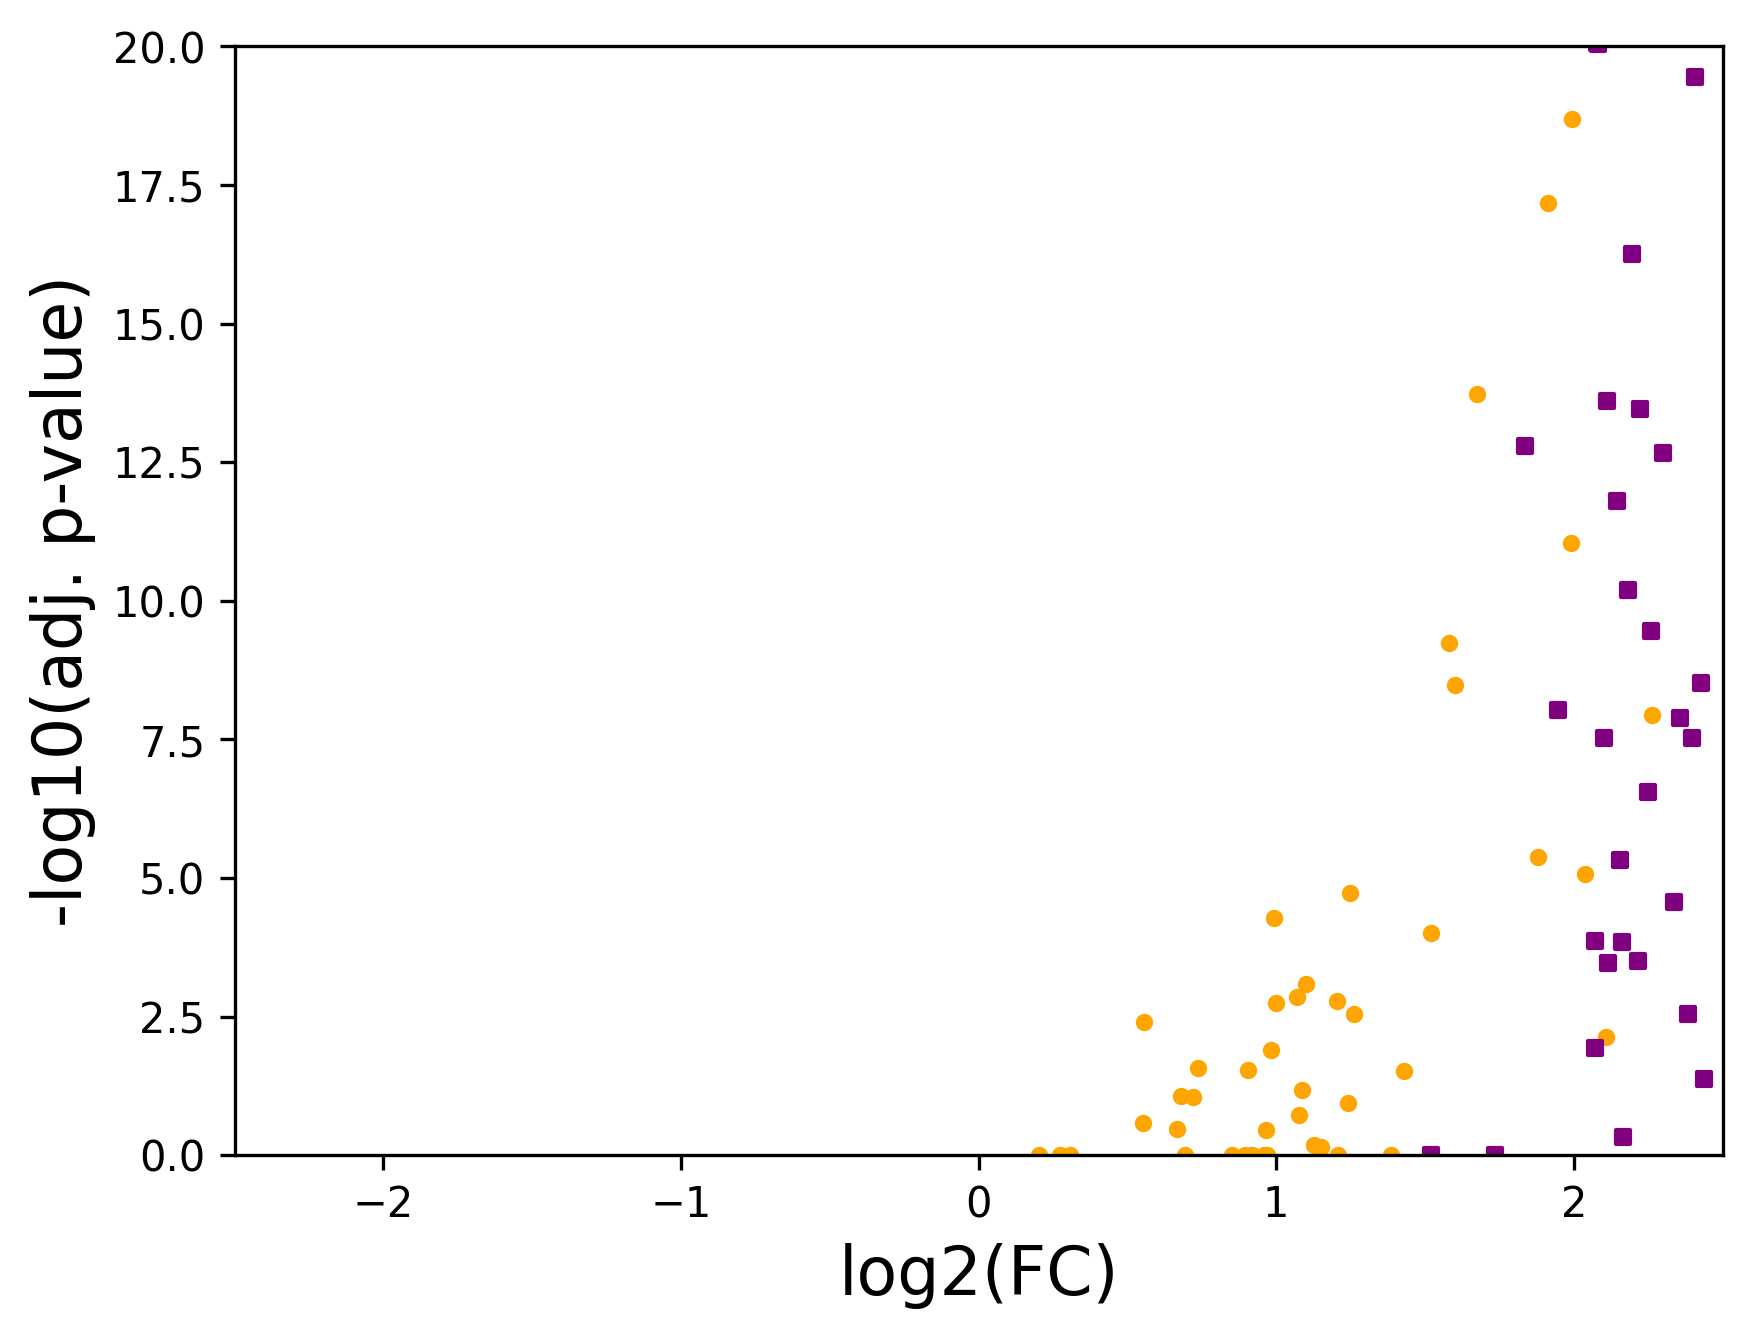

In [30]:
plt.scatter(np.log2(kcnk9_fcs_by_type), -np.log10(kcnk9_pvals_by_type), s=10, c='orange')
plt.scatter(np.log2(chrnb2_fcs_by_type), -np.log10(chrnb2_pvals_by_type), s=10, c='purple', marker='s')
plt.xlim([-2.5, 2.5])
plt.ylim([0,20])
plt.xlabel('log2(FC)')
plt.ylabel('-log10(adj. p-value)')
ax = plt.gca()
ax.set_axisbelow(True)
plt.savefig('Kcnk9-Chrnb2_volcano.svg')

In [84]:
DE_p7_genes_by_type = []
DE_p7b2_genes_by_type = []
for i in tqdm(range(len(adata_combined_p7_type_list))):
    type_df = sc.get.rank_genes_groups_df(adata_combined_p7_type_list[i], 'WT', pval_cutoff=0.05)
    type_df = type_df[type_df.names.isin(gene_names)]
    type_genes_p7 = []
    type_genes_p7b2 = []
    for j in type_df.names:
        fc_index = gene_names.index(j)
        if np.log2(p7_p7b2_fold_changes_by_type[i][fc_index]) > 1:
            type_genes_p7.append(j)
        elif np.log2(p7_p7b2_fold_changes_by_type[i][fc_index]) < -1:
            type_genes_p7b2.append(j)
    DE_p7_genes_by_type.append(type_genes_p7)
    DE_p7b2_genes_by_type.append(type_genes_p7b2)

100%|██████████████████████████████████████████████████████████████████████████████████| 45/45 [00:16<00:00,  2.70it/s]


In [37]:
LFC_cutoff_genes_dev = []
LFC_cutoff_gene_FCs_dev = []
for i in tqdm(range(len(biological_types))):
    fcs = p7_p5_fold_changes_by_type[i]
    cutoff_indices = [x for x in range(len(fcs)) if abs(np.log2(fcs[x])) > 1]
    cutoff_genes = [gene_names[x] for x in cutoff_indices]
    cutoff_gene_FCs = [fcs[x] for x in cutoff_indices]
    LFC_cutoff_genes_dev.append(cutoff_genes)
    LFC_cutoff_gene_FCs_dev.append(cutoff_gene_FCs)

100%|██████████████████████████████████████████████████████████████████████████████████| 45/45 [00:00<00:00, 83.17it/s]


In [38]:
adata_combined_dev_type_list = []
for i in tqdm(range(len(biological_types))):
    P56_type = int(biological_types[i].split('_')[0])
    p7_adata_type = p7_adata[p7_adata.obs['P56_type'] == P56_type]
    p5_adata_type = p5_adata[p5_adata.obs['P56_type'] == P56_type]
    
    combined_dev_adata_type = ad.concat([p7_adata_type, p5_adata_type], label='Condition', keys=['P7', 'P5'])
    combined_dev_adata_type.obs_names_make_unique()
    
    sc.tl.rank_genes_groups(combined_dev_adata_type, groupby='Condition', method='wilcoxon', mask_var=combined_dev_adata_type.raw.var_names.isin(LFC_cutoff_genes_dev[i]))
    
    adata_combined_dev_type_list.append(combined_dev_adata_type)

100%|██████████████████████████████████████████████████████████████████████████████████| 45/45 [00:47<00:00,  1.06s/it]


In [40]:
DE_p7_genes_by_type_dev = []
DE_p5_genes_by_type_dev = []
for i in tqdm(range(len(adata_combined_dev_type_list))):
    type_df = sc.get.rank_genes_groups_df(adata_combined_dev_type_list[i], 'P7', pval_cutoff=0.05)
    type_df = type_df[type_df.names.isin(gene_names)]
    type_genes_p7 = []
    type_genes_p5 = []
    for j in type_df.names:
        fc_index = gene_names.index(j)
        if np.log2(p7_p5_fold_changes_by_type[i][fc_index]) > 1:
            type_genes_p7.append(j)
        elif np.log2(p7_p5_fold_changes_by_type[i][fc_index]) < -1:
            type_genes_p5.append(j)
    DE_p7_genes_by_type_dev.append(type_genes_p7)
    DE_p5_genes_by_type_dev.append(type_genes_p5)

100%|██████████████████████████████████████████████████████████████████████████████████| 45/45 [00:13<00:00,  3.22it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 45/45 [00:03<00:00, 14.78it/s]


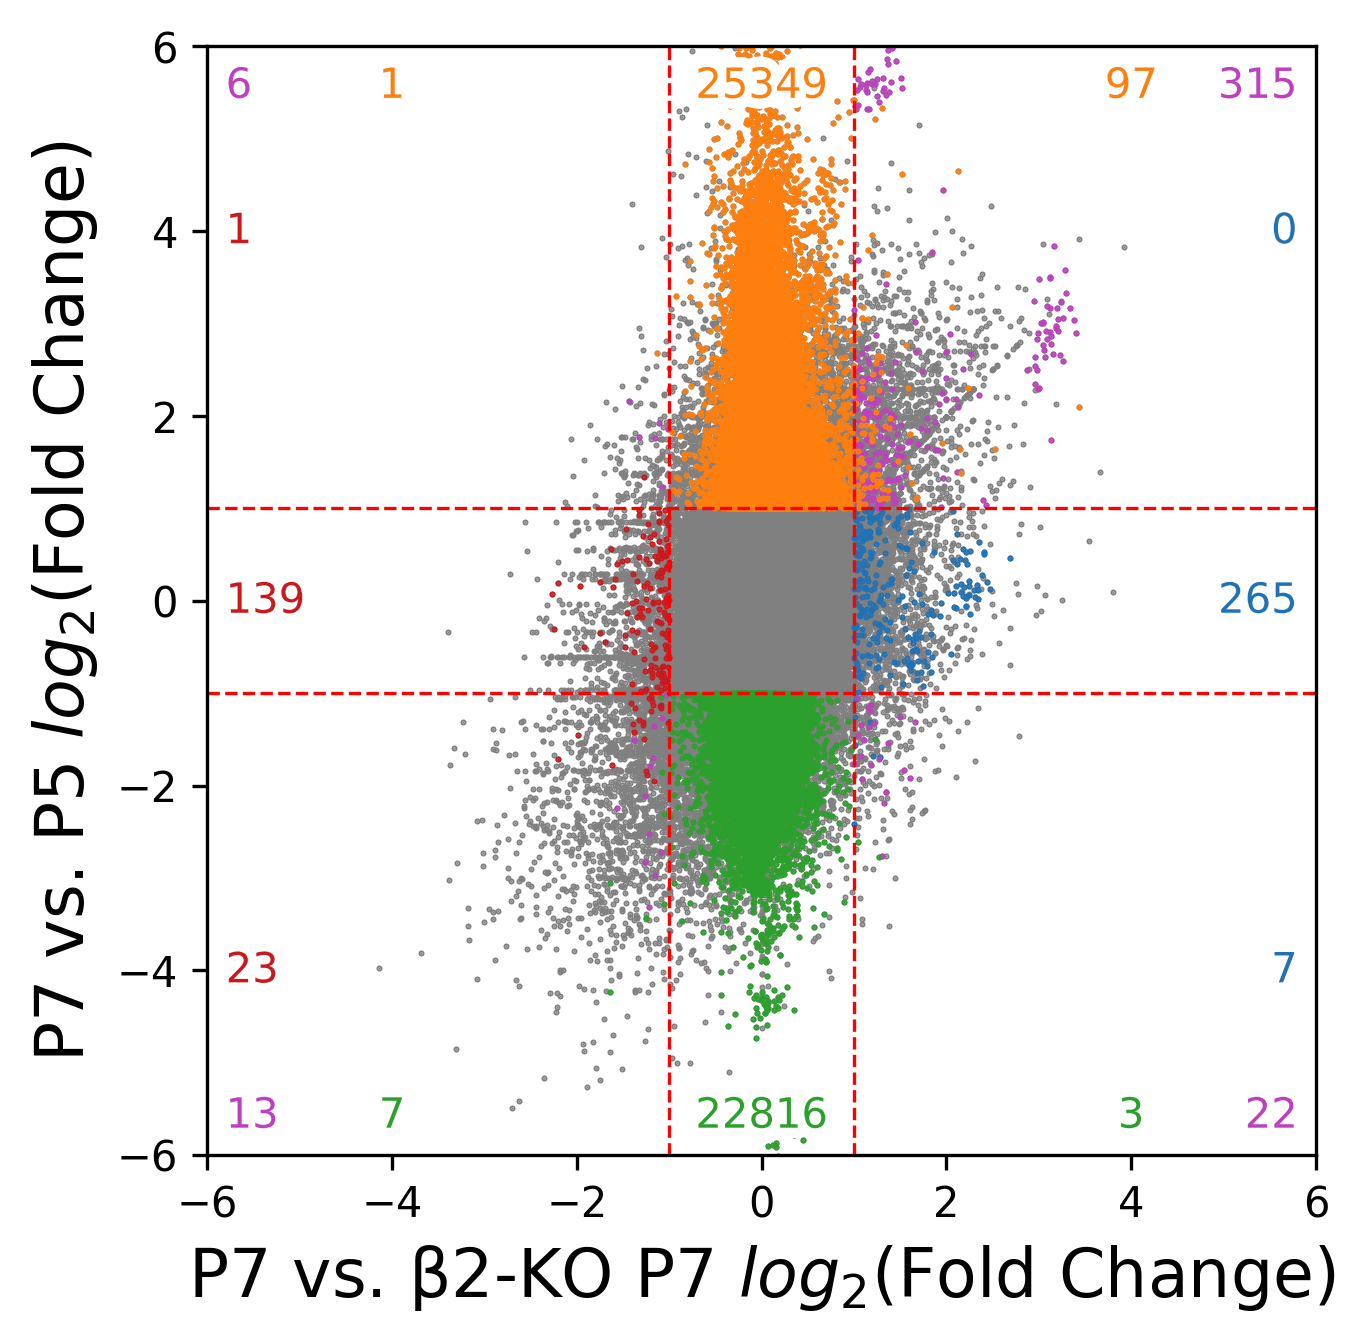

In [42]:
make_type_scatter(p7_p7b2_fold_changes_by_type, p7_p5_fold_changes_by_type, [p7_p7b2_blacklist_by_type, p7_p56_blacklist_by_type, p7_p5_blacklist_by_type], 'P7 vs. β2-KO P7 $log_2$(Fold Change)', 'P7 vs. P5 $log_2$(Fold Change)', 'P7vsP7b2-P7vsP5_type.svg', DE_p7_genes_by_type, DE_p7b2_genes_by_type, DE_p7_genes_by_type_dev, DE_p5_genes_by_type_dev, LFC_thresh=1, test_genes=LFC_cutoff_genes)

In [34]:
gene_count = []
for i in range(len(LFC_cutoff_genes)):
    gene_count.append(len(LFC_cutoff_genes[i]))

In [35]:
c_types = []
for i in p7_adata.obs['P56_type']:
    c_types.append('C' + str(i))
p7_adata.obs['C_type'] = pd.Categorical(c_types)

In [36]:
c_types = []
for i in p7b2_adata.obs['P56_type']:
    c_types.append('C' + str(i))
p7b2_adata.obs['C_type'] = pd.Categorical(c_types)

# GO Analysis

Gene lists for use in GO analysis at https://pantherdb.org/webservices/go/overrep.jsp

In [85]:
p7_DE_type_genes_flat = []
for i in DE_p7_genes_by_type:
    for j in i:
        if j not in p7_DE_type_genes_flat:
            p7_DE_type_genes_flat.append(j)

In [87]:
p7b2_DE_type_genes_flat = []
for i in DE_p7b2_genes_by_type:
    for j in i:
        if j not in p7b2_DE_type_genes_flat:
            p7b2_DE_type_genes_flat.append(j)

In [89]:
LFC_passing_genes_flat = []
for i in LFC_cutoff_genes:
    for j in i:
        if j not in LFC_passing_genes_flat:
            LFC_passing_genes_flat.append(j)

In [92]:
LFC_passing_genes_flat = []
for i in LFC_cutoff_genes:
    for j in i:
        if j not in LFC_passing_genes_flat:
            LFC_passing_genes_flat.append(j)

In [93]:
with open('p7_gene_list.txt', 'a') as p7_file:
    for i in p7_DE_type_genes_flat:
        p7_file.write(i + '\n')

In [94]:
with open('p7b2_gene_list.txt', 'a') as p7b2_file:
    for i in p7b2_DE_type_genes_flat:
        p7b2_file.write(i + '\n')

In [95]:
with open('LFC_passing_gene_list.txt', 'a') as LFC_file:
    for i in LFC_passing_genes_flat:
        LFC_file.write(i + '\n')

In [100]:
overlap_count = 0
for i in p7_DE_type_genes_flat:
    if i in p7b2_DE_type_genes_flat:
        overlap_count += 1
print(overlap_count)

7


In [24]:
p7_type_GO = pd.read_csv('Type-Specific GO Analysis/p7_GO_new.txt', sep='\t').sort_values('p7_gene_list.txt (FDR)')

In [25]:
p7b2_type_GO = pd.read_csv('Type-Specific GO Analysis/p7b2_GO_new.txt', sep='\t').sort_values('p7b2_gene_list.txt (FDR)')

In [26]:
p7_type_nums = p7_type_GO[:30]['p7_gene_list.txt (137)'].values #111
p7_type_fdrs = p7_type_GO[:30]['p7_gene_list.txt (FDR)'].values
p7_type_terms = []
for i in p7_type_GO[:30]['GO biological process complete'].values:
    p7_type_terms.append(i.split(' (')[0])
p7_type_IDs = []
for i in p7_type_GO[:30]['GO biological process complete'].values:
    p7_type_IDs.append(i.split(' (')[1][:-1])
p7_type_term_IDs = p7_type_GO[:30]['GO biological process complete'].values

In [27]:
p7_type_GO_df = pd.DataFrame([p7_type_nums, p7_type_terms, p7_type_fdrs, p7_type_IDs, p7_type_term_IDs]).T
p7_type_GO_df = p7_type_GO_df.rename(columns={0: 'Number of Genes', 1: 'Term', 2: 'FDR', 3: 'GO_ID', 4: 'Term (GO_ID)'})

In [28]:
p7b2_type_nums = p7b2_type_GO[:30]['p7b2_gene_list.txt (101)'].values #126
p7b2_type_fdrs = p7b2_type_GO[:30]['p7b2_gene_list.txt (FDR)'].values
p7b2_type_terms = []
for i in p7b2_type_GO[:30]['GO biological process complete'].values:
    p7b2_type_terms.append(i.split(' (')[0])
p7b2_type_IDs = []
for i in p7b2_type_GO[:30]['GO biological process complete'].values:
    p7b2_type_IDs.append(i.split(' (')[1][:-1])
p7b2_type_term_IDs = p7b2_type_GO[:30]['GO biological process complete'].values

In [29]:
p7b2_type_GO_df = pd.DataFrame([p7b2_type_nums, p7b2_type_terms, p7b2_type_fdrs, p7b2_type_IDs, p7b2_type_term_IDs]).T
p7b2_type_GO_df = p7b2_type_GO_df.rename(columns={0: 'Number of Genes', 1: 'Term', 2: 'FDR', 3: 'GO_ID', 4: 'Term (GO_ID)'})

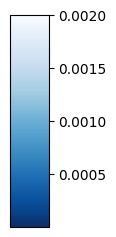

In [30]:
fig, ax = plt.subplots(figsize = (0.5, 2.75))

cmap = mpl.cm.Blues_r
norm = mpl.colors.Normalize(vmin = min(p7_type_fdrs), vmax = max(p7_type_fdrs))

mapper = cm.ScalarMappable(norm = norm, cmap = cm.Blues_r)

cbl = mpl.colorbar.ColorbarBase(ax, cmap = cmap, norm = norm, orientation = 'vertical')
plt.savefig('p7_GO_bar.svg')

C:\Users\pomat\AppData\Local\Temp\ipykernel_49300\2902908770.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(p7_type_GO_df, x = "Number of Genes", y = 'Term', palette = mapper.to_rgba(p7_type_fdrs), linewidth=0.5, edgecolor="0")
C:\Users\pomat\AppData\Local\Temp\ipykernel_49300\2902908770.py:2: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(p7_type_GO_df, x = "Number of Genes", y = 'Term', palette = mapper.to_rgba(p7_type_fdrs), linewidth=0.5, edgecolor="0")
C:\Users\pomat\AppData\Local\Temp\ipykernel_49300\2902908770.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([textwrap.fill(e, 25) for e in p7_type_terms], fontsize=5)


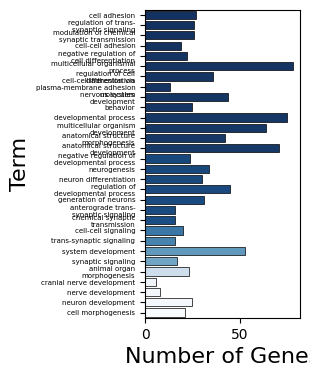

In [31]:
plt.figure(figsize = (2,4))
ax = sns.barplot(p7_type_GO_df, x = "Number of Genes", y = 'Term', palette = mapper.to_rgba(p7_type_fdrs), linewidth=0.5, edgecolor="0")


ax.set_yticklabels([textwrap.fill(e, 25) for e in p7_type_terms], fontsize=5)

plt.savefig('p7_GO.svg')
plt.show()

In [32]:
p7_type_terms_trunc = ["regulation of trans-synaptic signaling", "cell-cell adhesion", "regulation of cell differentiation", "nervous system development", "neurogenesis"]

In [33]:
p7_type_GO_df_trunc = p7_type_GO_df[p7_type_GO_df['Term'].isin(p7_type_terms_trunc)]

In [34]:
p7_type_GO_df_trunc

,Number of Genes,Term,FDR,GO_ID,Term (GO_ID)
1,26,regulation of trans-synaptic signaling,0.000001,GO:0099177,regulation of trans-synaptic signaling (GO:009...
3,19,cell-cell adhesion,0.000005,GO:0098609,cell-cell adhesion (GO:0098609)
6,36,regulation of cell differentiation,0.00002,GO:0045595,regulation of cell differentiation (GO:0045595)
8,44,nervous system development,0.000029,GO:0007399,nervous system development (GO:0007399)
15,34,neurogenesis,0.000166,GO:0022008,neurogenesis (GO:0022008)


In [38]:
p7_type_fdrs_trunc = -np.log10(p7_type_GO_df_trunc['FDR'].values.astype('float'))

In [39]:
p7_type_term_IDs_trunc = p7_type_GO_df_trunc['Term (GO_ID)'].values

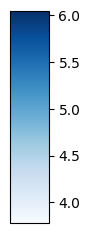

In [42]:
fig, ax = plt.subplots(figsize = (0.5, 2.75))

cmap = mpl.cm.Blues
norm = mpl.colors.Normalize(vmin = min(p7_type_fdrs_trunc), vmax = max(p7_type_fdrs_trunc))

mapper = cm.ScalarMappable(norm = norm, cmap = cm.
                           Blues)

cbl = mpl.colorbar.ColorbarBase(ax, cmap = cmap, norm = norm, orientation = 'vertical')
plt.savefig('p7_GO_bar_trunc.svg')

C:\Users\pomat\AppData\Local\Temp\ipykernel_49300\1960759872.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(p7_type_GO_df_trunc, x = "Number of Genes", y = 'Term', palette = mapper.to_rgba(p7_type_fdrs_trunc), linewidth=0.5, edgecolor="0")
C:\Users\pomat\AppData\Local\Temp\ipykernel_49300\1960759872.py:2: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(p7_type_GO_df_trunc, x = "Number of Genes", y = 'Term', palette = mapper.to_rgba(p7_type_fdrs_trunc), linewidth=0.5, edgecolor="0")
C:\Users\pomat\AppData\Local\Temp\ipykernel_49300\1960759872.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([textwrap.fill(e, 25) for e in p7_type_term_IDs_trunc], fontsize=10)


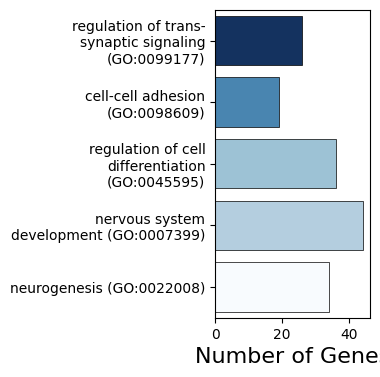

In [43]:
plt.figure(figsize = (2,4))
ax = sns.barplot(p7_type_GO_df_trunc, x = "Number of Genes", y = 'Term', palette = mapper.to_rgba(p7_type_fdrs_trunc), linewidth=0.5, edgecolor="0")


ax.set_yticklabels([textwrap.fill(e, 25) for e in p7_type_term_IDs_trunc], fontsize=10)

plt.ylabel('')
plt.savefig('p7_GO_trunc.svg')
plt.show()

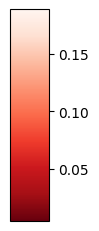

In [44]:
fig, ax = plt.subplots(figsize = (0.5, 2.75))

cmap = mpl.cm.Reds_r
norm = mpl.colors.Normalize(vmin = min(p7b2_type_fdrs), vmax = max(p7b2_type_fdrs))

mapper = cm.ScalarMappable(norm = norm, cmap = cm.Reds_r)

cbl = mpl.colorbar.ColorbarBase(ax, cmap = cmap, norm = norm, orientation = 'vertical')
plt.savefig('p7b2_GO_bar.svg')

C:\Users\pomat\AppData\Local\Temp\ipykernel_49300\2682254361.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(p7b2_type_GO_df, x = "Number of Genes", y = 'Term', palette = mapper.to_rgba(p7b2_type_fdrs), linewidth=0.5, edgecolor="0")
C:\Users\pomat\AppData\Local\Temp\ipykernel_49300\2682254361.py:2: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(p7b2_type_GO_df, x = "Number of Genes", y = 'Term', palette = mapper.to_rgba(p7b2_type_fdrs), linewidth=0.5, edgecolor="0")
C:\Users\pomat\AppData\Local\Temp\ipykernel_49300\2682254361.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([textwrap.fill(e, 25) for e in p7b2_type_terms], fontsize=5)


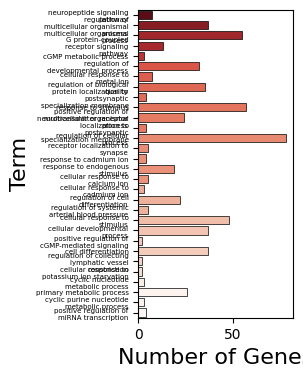

In [45]:
plt.figure(figsize = (2,4))
ax = sns.barplot(p7b2_type_GO_df, x = "Number of Genes", y = 'Term', palette = mapper.to_rgba(p7b2_type_fdrs), linewidth=0.5, edgecolor="0")

ax.set_yticklabels([textwrap.fill(e, 25) for e in p7b2_type_terms], fontsize=5)

plt.savefig('p7b2_GO.svg')
plt.show()

In [46]:
p7b2_type_terms_trunc = ["neuropeptide signaling pathway", "G protein-coupled receptor signaling pathway", "cGMP metabolic process", "cellular response to metal ion", "protein localization to postsynaptic specialization membrane"]

In [47]:
p7b2_type_GO_df_trunc = p7b2_type_GO_df[p7b2_type_GO_df['Term'].isin(p7b2_type_terms_trunc)]

In [48]:
p7b2_type_GO_df_trunc

,Number of Genes,Term,FDR,GO_ID,Term (GO_ID)
0,7,neuropeptide signaling pathway,0.00431,GO:0007218,neuropeptide signaling pathway (GO:0007218)
3,13,G protein-coupled receptor signaling pathway,0.0413,GO:0007186,G protein-coupled receptor signaling pathway (...
4,3,cGMP metabolic process,0.0552,GO:0046068,cGMP metabolic process (GO:0046068)
6,7,cellular response to metal ion,0.0818,GO:0071248,cellular response to metal ion (GO:0071248)
8,4,protein localization to postsynaptic specializ...,0.0899,GO:0099633,protein localization to postsynaptic specializ...


In [50]:
p7b2_type_fdrs_trunc = -np.log10(p7b2_type_GO_df_trunc['FDR'].values.astype('float'))

In [51]:
p7b2_type_term_IDs_trunc = p7b2_type_GO_df_trunc['Term (GO_ID)'].values

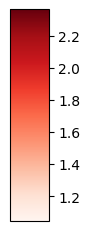

In [52]:
fig, ax = plt.subplots(figsize = (0.5, 2.75))

cmap = mpl.cm.Reds
norm = mpl.colors.Normalize(vmin = min(p7b2_type_fdrs_trunc), vmax = max(p7b2_type_fdrs_trunc))

mapper = cm.ScalarMappable(norm = norm, cmap = cm.Reds)

cbl = mpl.colorbar.ColorbarBase(ax, cmap = cmap, norm = norm, orientation = 'vertical')
plt.savefig('p7b2_GO_bar_trunc.svg')

C:\Users\pomat\AppData\Local\Temp\ipykernel_49300\12383159.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(p7b2_type_GO_df_trunc, x = "Number of Genes", y = 'Term', palette = mapper.to_rgba(p7b2_type_fdrs_trunc), linewidth=0.5, edgecolor="0")
C:\Users\pomat\AppData\Local\Temp\ipykernel_49300\12383159.py:2: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(p7b2_type_GO_df_trunc, x = "Number of Genes", y = 'Term', palette = mapper.to_rgba(p7b2_type_fdrs_trunc), linewidth=0.5, edgecolor="0")
C:\Users\pomat\AppData\Local\Temp\ipykernel_49300\12383159.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([textwrap.fill(e, 25) for e in p7b2_type_term_IDs_trunc], fontsize=10)


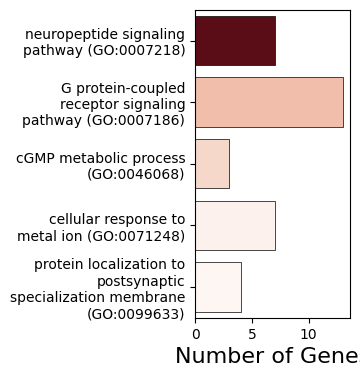

In [53]:
plt.figure(figsize = (2,4))
ax = sns.barplot(p7b2_type_GO_df_trunc, x = "Number of Genes", y = 'Term', palette = mapper.to_rgba(p7b2_type_fdrs_trunc), linewidth=0.5, edgecolor="0")

ax.set_yticklabels([textwrap.fill(e, 25) for e in p7b2_type_term_IDs_trunc], fontsize=10)

plt.ylabel('')
plt.savefig('p7b2_GO_trunc.svg')
plt.show()

In [110]:
GO_gene_dict = pd.read_csv('mgi.gaf', sep='\t', names=['DB', 'DB Object ID', 'DB Object Symbol', 'Qualifier', 'GO ID', 'DB:Reference', 'Evidence Code', 'With or From', 'Aspect', 'DB Object Name', 'DB Object Synonym', 'DB Object Type', 'Taxon', 'Date', 'Assigned By', 'Annotation Extension', 'Gene Product Form ID'])

C:\Users\pomat\AppData\Local\Temp\ipykernel_4268\2873030111.py:1: DtypeWarning: Columns (7,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  GO_gene_dict = pd.read_csv('mgi.gaf', sep='\t', names=['DB', 'DB Object ID', 'DB Object Symbol', 'Qualifier', 'GO ID', 'DB:Reference', 'Evidence Code', 'With or From', 'Aspect', 'DB Object Name', 'DB Object Synonym', 'DB Object Type', 'Taxon', 'Date', 'Assigned By', 'Annotation Extension', 'Gene Product Form ID'])


In [110]:
go_parent_children = pd.read_csv('go-parent-children.txt', sep='\t', names=np.arange(433))

C:\Users\pomat\AppData\Local\Temp\ipykernel_28664\583641898.py:1: DtypeWarning: Columns (14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,2

In [111]:
def get_all_children(GO_ID):
    children_df = go_parent_children[go_parent_children[0] == ' ' + GO_ID].values[0]
    children = list(children_df[~pd.isnull(children_df)])[1:]
    children.remove(GO_ID)
    num_children = len(children)
    all_children = [GO_ID]
    if num_children > 0:
        for i in children:
            [all_children.append(x) for x in get_all_children(i)]
    return all_children

In [112]:
p7_children_dict = {}
for i in tqdm(p7_type_GO[:100]['GO biological process complete']):
    GO_ID = i.split('(')[1][:-1]
    children = get_all_children(GO_ID)
    p7_children_dict[i] = children

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:57<00:00,  1.78s/it]


In [113]:
p7_gene_dict = {}
for i in tqdm(p7_type_GO[:100]['GO biological process complete']):
    GO_ID = i.split('(')[1][:-1]
    children = p7_children_dict[i]
    temp_df = GO_gene_dict[GO_gene_dict['GO ID'].isin(children)]
    gene_list = list(temp_df['DB Object Symbol'].values)
    gene_list_intersection = [x for x in p7_DE_type_genes_flat if x in gene_list]
    p7_gene_dict[GO_ID] = gene_list_intersection

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 56.22it/s]


In [114]:
p7b2_children_dict = {}
for i in tqdm(p7b2_type_GO[:100]['GO biological process complete']):
    GO_ID = i.split('(')[1][:-1]
    children = get_all_children(GO_ID)
    p7b2_children_dict[i] = children

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [21:27<00:00, 12.87s/it]


In [115]:
p7b2_gene_dict = {}
for i in tqdm(p7b2_type_GO[:100]['GO biological process complete']):
    GO_ID = i.split('(')[1][:-1]
    children = p7b2_children_dict[i]
    temp_df = GO_gene_dict[GO_gene_dict['GO ID'].isin(children)]
    gene_list = list(temp_df['DB Object Symbol'].values)
    gene_list_intersection = [x for x in p7b2_DE_type_genes_flat if x in gene_list]
    p7b2_gene_dict[GO_ID] = gene_list_intersection

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 47.35it/s]


In [116]:
p7_gene_dict_lengths = []
for i in p7_gene_dict.keys():
    p7_gene_dict_lengths.append(len(p7_gene_dict[i]))

In [117]:
p7_gene_df_dict = {}
for i in p7_gene_dict.keys():
    gene_list = p7_gene_dict[i]
    gene_list_supp = gene_list + (max(p7_gene_dict_lengths)-len(gene_list))*['-']
    p7_gene_df_dict[i] = gene_list_supp

In [118]:
p7_gene_df = pd.DataFrame(data=p7_gene_df_dict)
p7_gene_df = (p7_gene_df.T)
p7_gene_df.insert(loc=0, column='term', value=[i.split(' (')[0] for i in p7_type_GO[:100]['GO biological process complete']])
p7_gene_df.insert(loc=1, column='FDR', value=list(p7_type_GO[:100]['p7_gene_list.txt (FDR)'].values))

In [119]:
p7_gene_df.to_excel('Type-Specific GO Analysis/p7_go_genes.xlsx')

In [120]:
p7b2_gene_dict_lengths = []
for i in p7b2_gene_dict.keys():
    p7b2_gene_dict_lengths.append(len(p7b2_gene_dict[i]))

In [121]:
p7b2_gene_df_dict = {}
for i in p7b2_gene_dict.keys():
    gene_list = p7b2_gene_dict[i]
    gene_list_supp = gene_list + (max(p7b2_gene_dict_lengths)-len(gene_list))*['-']
    p7b2_gene_df_dict[i] = gene_list_supp

In [122]:
p7b2_gene_df = pd.DataFrame(data=p7b2_gene_df_dict)
p7b2_gene_df = (p7b2_gene_df.T)
p7b2_gene_df.insert(loc=0, column='term', value=[i.split(' (')[0] for i in p7b2_type_GO[:100]['GO biological process complete']])
p7b2_gene_df.insert(loc=1, column='FDR', value=list(p7b2_type_GO[:100]['p7b2_gene_list.txt (FDR)'].values))

In [123]:
p7b2_gene_df.to_excel('Type-Specific GO Analysis/p7b2_go_genes.xlsx')

# Select Wave-Dep Heatmap

In [101]:
p7_full_list = []
for i in DE_p7_genes_by_type:
    [p7_full_list.append(x) for x in i if x not in p7_full_list]

In [102]:
p7_type_matches = []
for i in p7_full_list:
    list_type = []
    for j in range(len(DE_p7_genes_by_type)):
        if i in DE_p7_genes_by_type[j]:
            list_type.append('C' + str(j+1))
    p7_type_matches.append(list_type)

In [103]:
p7b2_full_list = []
for i in DE_p7b2_genes_by_type:
    [p7b2_full_list.append(x) for x in i if x not in p7b2_full_list]

In [104]:
p7b2_type_matches = []
for i in p7b2_full_list:
    list_type = []
    for j in range(len(DE_p7b2_genes_by_type)):
        if i in DE_p7b2_genes_by_type[j]:
            list_type.append('C' + str(j+1))
    p7b2_type_matches.append(list_type)

In [107]:
p7_example_gene_list = ['Plcb1', 'Kcnq3', 'Rgs4', 'Cdh6', 'Adcyap1', 'Serpine2', 'Kcnip1', 'Kcnip4', 'Npnt', 'Nrep', 'Kcnk9', 'Chrnb2']
p7b2_example_gene_list = ['Shisa6', 'Gpr83', 'Tac1', 'Gria1', 'Gna14', 'Cpne4', 'Gldn', 'Chrm3', 'Jun', 'Egr1']

In [108]:
p7_example_heatmap = []
for i in p7_example_gene_list:
    gene_index = gene_names.index(i)
    row = []
    for j in p7_p7b2_fold_changes_by_type:
        row.append(np.log2(j[gene_index]))
    p7_example_heatmap.append(row)
p7_example_heatmap = np.array(p7_example_heatmap)

In [109]:
p7_example_sigs = []
for i in p7_example_gene_list:
    gene_index = p7_full_list.index(i)
    row_indices = [int(i[1:])-1 for i in p7_type_matches[gene_index]]
    row = p7_example_heatmap.shape[1]*[False]
    for j in row_indices:
        row[j] = True
    p7_example_sigs.append(row)
p7_example_sigs = np.array(p7_example_sigs)

In [110]:
p7b2_example_heatmap = []
for i in p7b2_example_gene_list:
    gene_index = gene_names.index(i)
    row = []
    for j in p7_p7b2_fold_changes_by_type:
        row.append(np.log2(j[gene_index]))
    p7b2_example_heatmap.append(row)
p7b2_example_heatmap = np.array(p7b2_example_heatmap)

In [111]:
p7b2_example_sigs = []
for i in p7b2_example_gene_list:
    gene_index = p7b2_full_list.index(i)
    row_indices = [int(i[1:])-1 for i in p7b2_type_matches[gene_index]]
    row = p7b2_example_heatmap.shape[1]*[False]
    for j in row_indices:
        row[j] = True
    p7b2_example_sigs.append(row)
p7b2_example_sigs = np.array(p7b2_example_sigs)

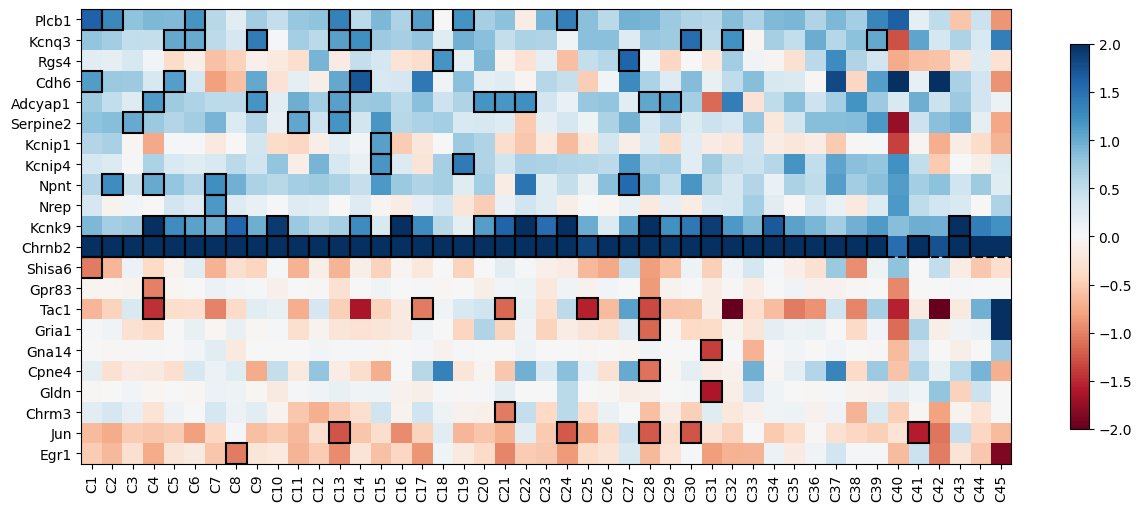

In [112]:
plt.subplots(figsize=(15,10))
plt.imshow(np.vstack([p7_example_heatmap, p7b2_example_heatmap]), cmap='RdBu', vmax=2, vmin=-2, interpolation='none')
all_sigs = np.vstack([p7_example_sigs, p7b2_example_sigs])
for i in range(all_sigs.shape[0]):
    for j in range(all_sigs.shape[1]):
        if all_sigs[i][j]:
            rect = patches.Rectangle((j-0.5, i-0.5), 1, 1, linewidth=1.5, edgecolor='black', facecolor='none')
            plt.gca().add_patch(rect)
plt.colorbar(shrink=0.5)
example_gene_list = p7_example_gene_list + p7b2_example_gene_list
plt.yticks(np.arange(len(example_gene_list)), example_gene_list)
plt.xticks(np.arange(p7_example_heatmap.shape[1]), ['C' + str(i+1) for i in range(p7_example_heatmap.shape[1])], rotation=90)
plt.hlines([11.5], -0.5, 44.5, color='black', linestyle='dashed')
plt.savefig('fig3-heatmap.svg')
plt.show()

# Full Wave-Dep Heatmap

In [116]:
p7_full_heatmap = []
for i in p7_full_list:
    gene_index = gene_names.index(i)
    row = []
    for j in p7_p7b2_fold_changes_by_type:
        row.append(np.log2(j[gene_index]))
    p7_full_heatmap.append(row)
p7_full_heatmap = np.array(p7_full_heatmap)

In [117]:
p7_full_sigs = []
for i in p7_full_list:
    gene_index = p7_full_list.index(i)
    row_indices = [int(i[1:])-1 for i in p7_type_matches[gene_index]]
    row = p7_full_heatmap.shape[1]*[False]
    for j in row_indices:
        row[j] = True
    p7_full_sigs.append(row)
p7_full_sigs = np.array(p7_full_sigs)

In [118]:
p7b2_full_heatmap = []
for i in p7b2_full_list:
    gene_index = gene_names.index(i)
    row = []
    for j in p7_p7b2_fold_changes_by_type:
        row.append(np.log2(j[gene_index]))
    p7b2_full_heatmap.append(row)
p7b2_full_heatmap = np.array(p7b2_full_heatmap)

In [119]:
p7b2_full_sigs = []
for i in p7b2_full_list:
    gene_index = p7b2_full_list.index(i)
    row_indices = [int(i[1:])-1 for i in p7b2_type_matches[gene_index]]
    row = p7b2_full_heatmap.shape[1]*[False]
    for j in row_indices:
        row[j] = True
    p7b2_full_sigs.append(row)
p7b2_full_sigs = np.array(p7b2_full_sigs)

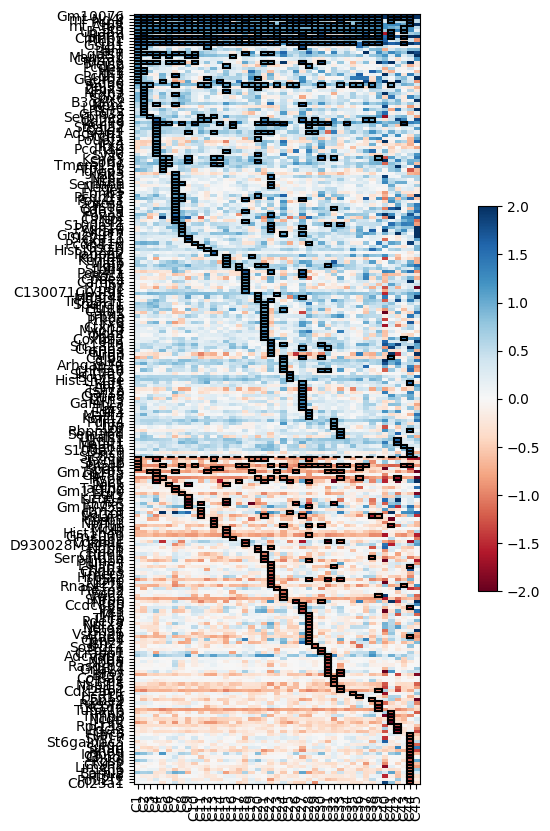

In [130]:
full_gene_list = p7_full_list + p7b2_full_list
plt.subplots(figsize=(15,10))
plt.imshow(np.vstack([p7_full_heatmap, p7b2_full_heatmap]), cmap='RdBu', vmax=2, vmin=-2, interpolation='none', aspect=0.5)
all_sigs = np.vstack([p7_full_sigs, p7b2_full_sigs])
for i in range(all_sigs.shape[0]):
    for j in range(all_sigs.shape[1]):
        if all_sigs[i][j]:
            rect = patches.Rectangle((j-0.5, i-0.5), 1, 1, linewidth=1.5, edgecolor='black', facecolor='none')
            plt.gca().add_patch(rect)
plt.colorbar(shrink=0.5)
plt.yticks(np.arange(len(full_gene_list)), full_gene_list)
plt.xticks(np.arange(p7_full_heatmap.shape[1]), ['C' + str(i+1) for i in range(p7_full_heatmap.shape[1])], rotation=90)
plt.hlines([len(p7_full_list)-0.5], -0.5, 44.5, color='black', linestyle='dashed')
plt.savefig('supp-heatmap.svg')
plt.show()

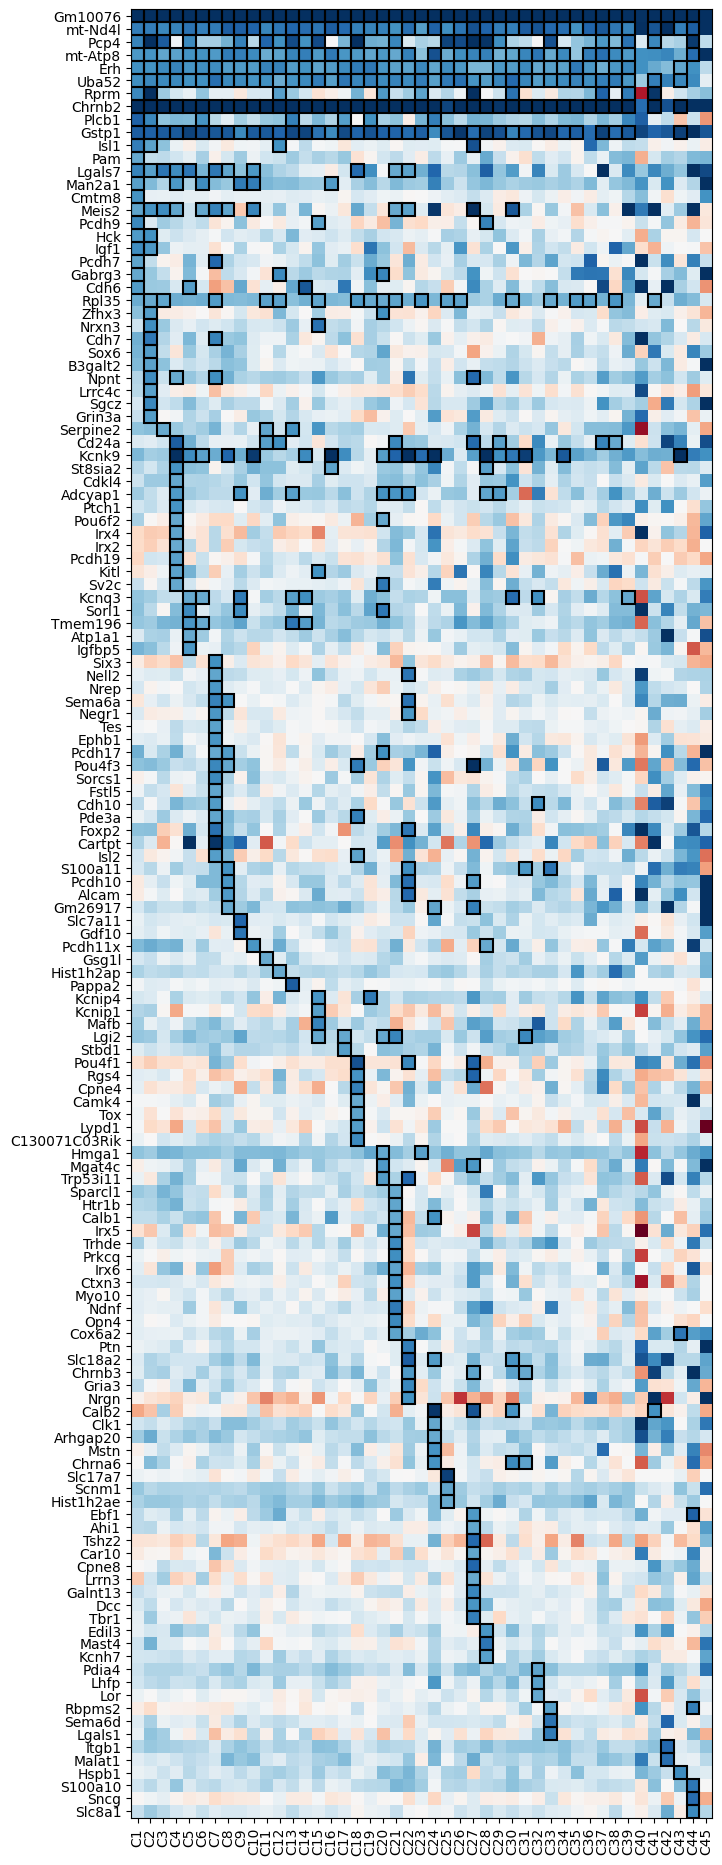

In [148]:
full_gene_list = p7_full_list
plt.subplots(figsize=(7.5,(10/22)*len(full_gene_list)))
plt.imshow(np.vstack([p7_full_heatmap]), cmap='RdBu', vmax=2, vmin=-2, interpolation='none', aspect=1)
all_sigs = np.vstack([p7_full_sigs])
for i in range(all_sigs.shape[0]):
    for j in range(all_sigs.shape[1]):
        if all_sigs[i][j]:
            rect = patches.Rectangle((j-0.5, i-0.5), 1, 1, linewidth=1.5, edgecolor='black', facecolor='none')
            plt.gca().add_patch(rect)
# plt.colorbar(shrink=0.5)
plt.yticks(np.arange(len(full_gene_list)), full_gene_list)
plt.xticks(np.arange(p7_full_heatmap.shape[1]), ['C' + str(i+1) for i in range(p7_full_heatmap.shape[1])], rotation=90)
plt.savefig('supp-heatmap-wt.svg')
plt.show()

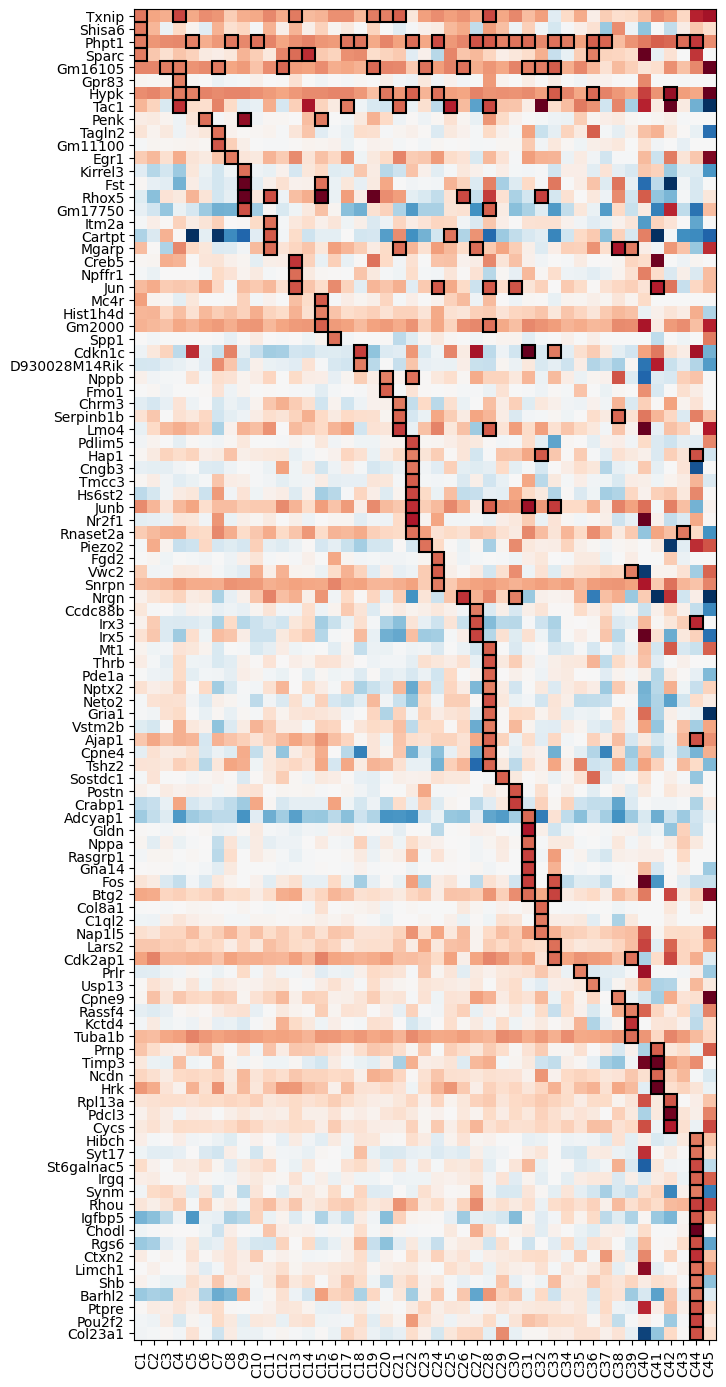

In [149]:
full_gene_list = p7b2_full_list
plt.subplots(figsize=(7.5,(10/22)*len(full_gene_list)))
im = plt.imshow(np.vstack([p7b2_full_heatmap]), cmap='RdBu', vmax=2, vmin=-2, interpolation='none', aspect=1)
all_sigs = np.vstack([p7b2_full_sigs])
for i in range(all_sigs.shape[0]):
    for j in range(all_sigs.shape[1]):
        if all_sigs[i][j]:
            rect = patches.Rectangle((j-0.5, i-0.5), 1, 1, linewidth=1.5, edgecolor='black', facecolor='none')
            plt.gca().add_patch(rect)
# plt.colorbar(shrink=0.5)
plt.yticks(np.arange(len(full_gene_list)), full_gene_list)
plt.xticks(np.arange(p7_full_heatmap.shape[1]), ['C' + str(i+1) for i in range(p7_full_heatmap.shape[1])], rotation=90)
plt.savefig('supp-heatmap-b2.svg')
plt.show()

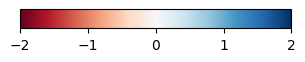

In [153]:
fig, ax = plt.subplots(figsize = (3.5, 0.25))

cmap = mpl.cm.RdBu
norm = mpl.colors.Normalize(vmin = -2, vmax = 2)

mapper = cm.ScalarMappable(norm = norm, cmap = cm.RdBu)

cbl = mpl.colorbar.ColorbarBase(ax, cmap = cmap, norm = norm, orientation = 'horizontal')
plt.savefig('supp-heatmap-colorbar.svg')

# Alpha Kcnk9 Wave-Dep Changes

In [174]:
for i in [41, 44, 40, 42]:
    sub_p7 = adata_combined_p7_type_list[i][adata_combined_p7_type_list[i].obs['Condition'] == 'WT']
    sub_p7b2 = adata_combined_p7_type_list[i][adata_combined_p7_type_list[i].obs['Condition'] == 'β2-KO']
    print(i+1, len(sub_p7), len(sub_p7b2))

42 21 26
45 10 6
41 45 30
43 91 94


In [265]:
dummy_list = [0 for x in range(45)]
dummy_list[41] = 'αOFF-S'
dummy_list[44] = 'αOFF-T'
dummy_list[40] = 'αON-T'
dummy_list[42] = 'αON-S'

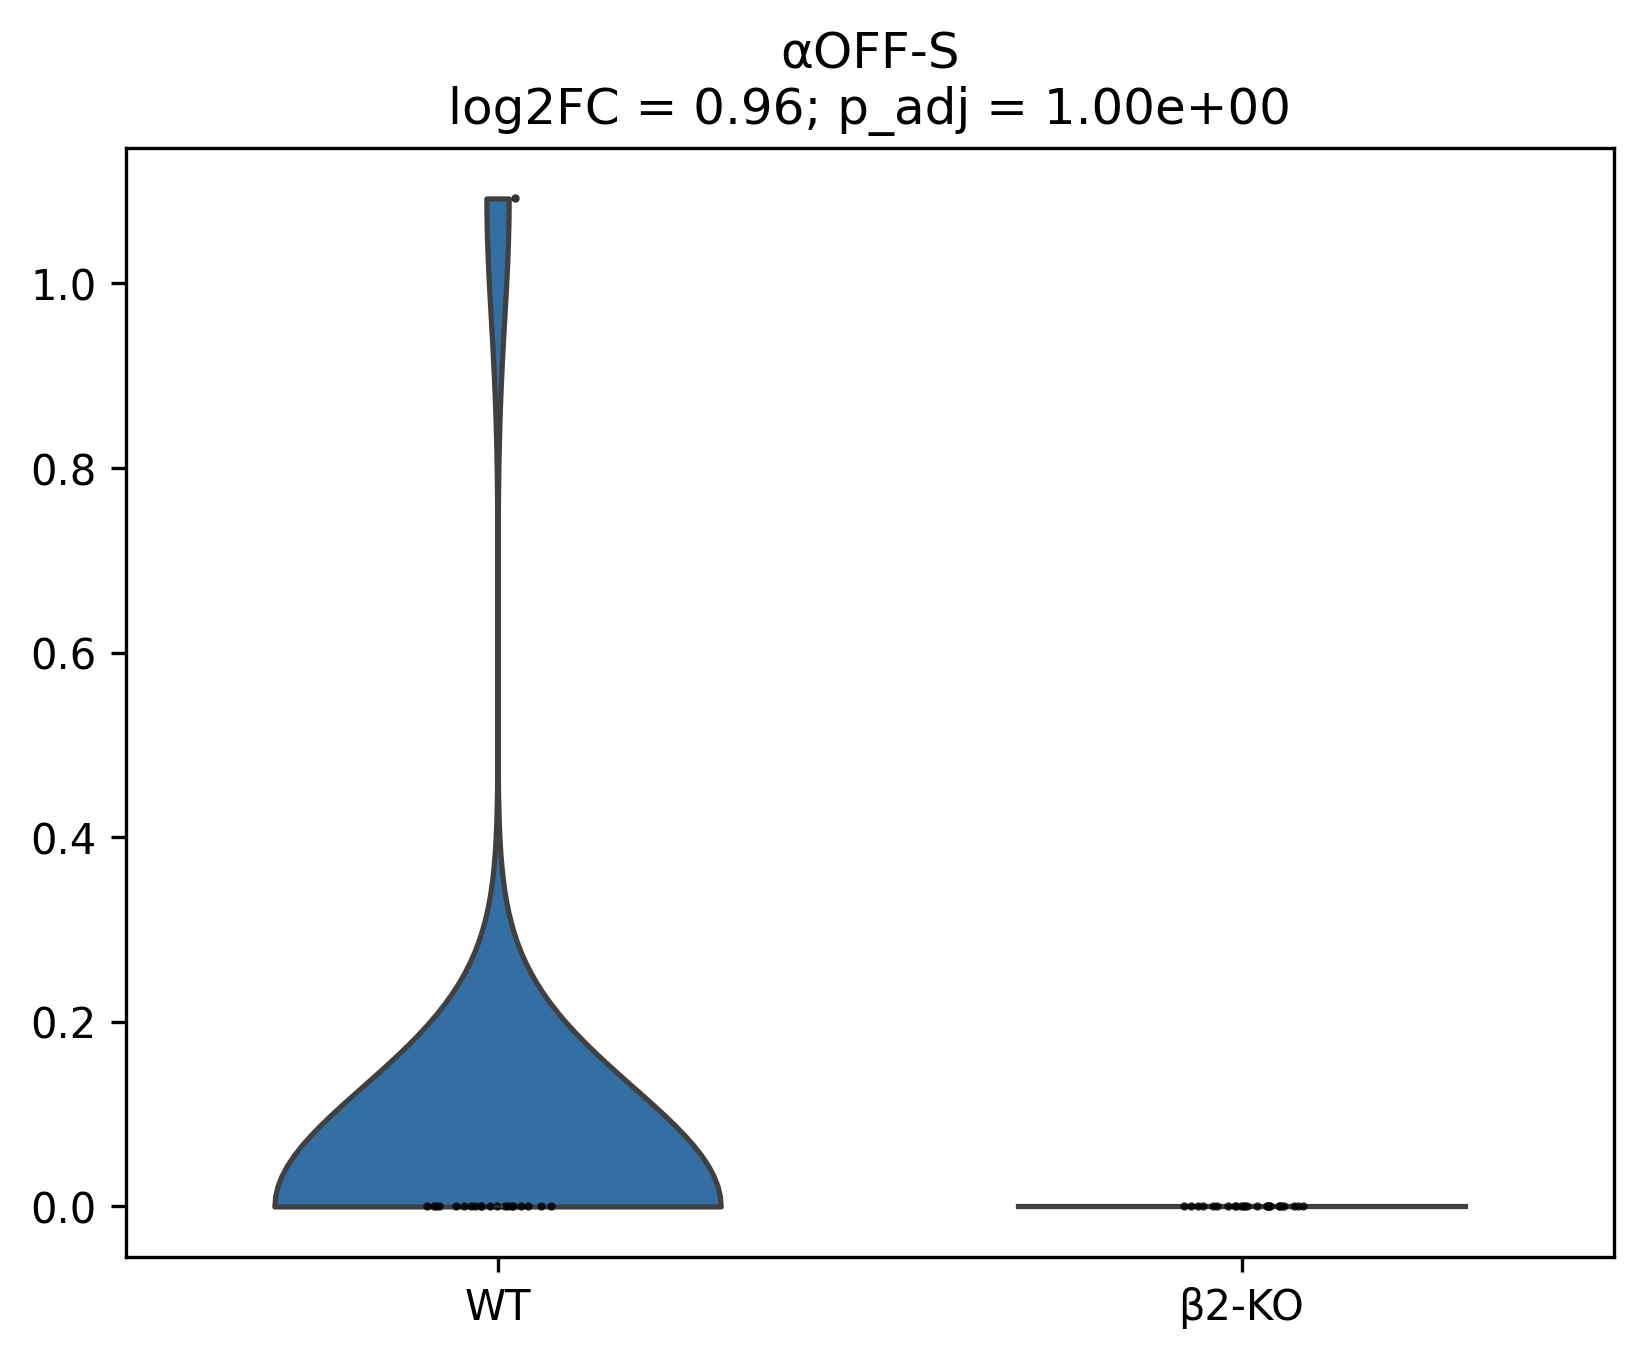

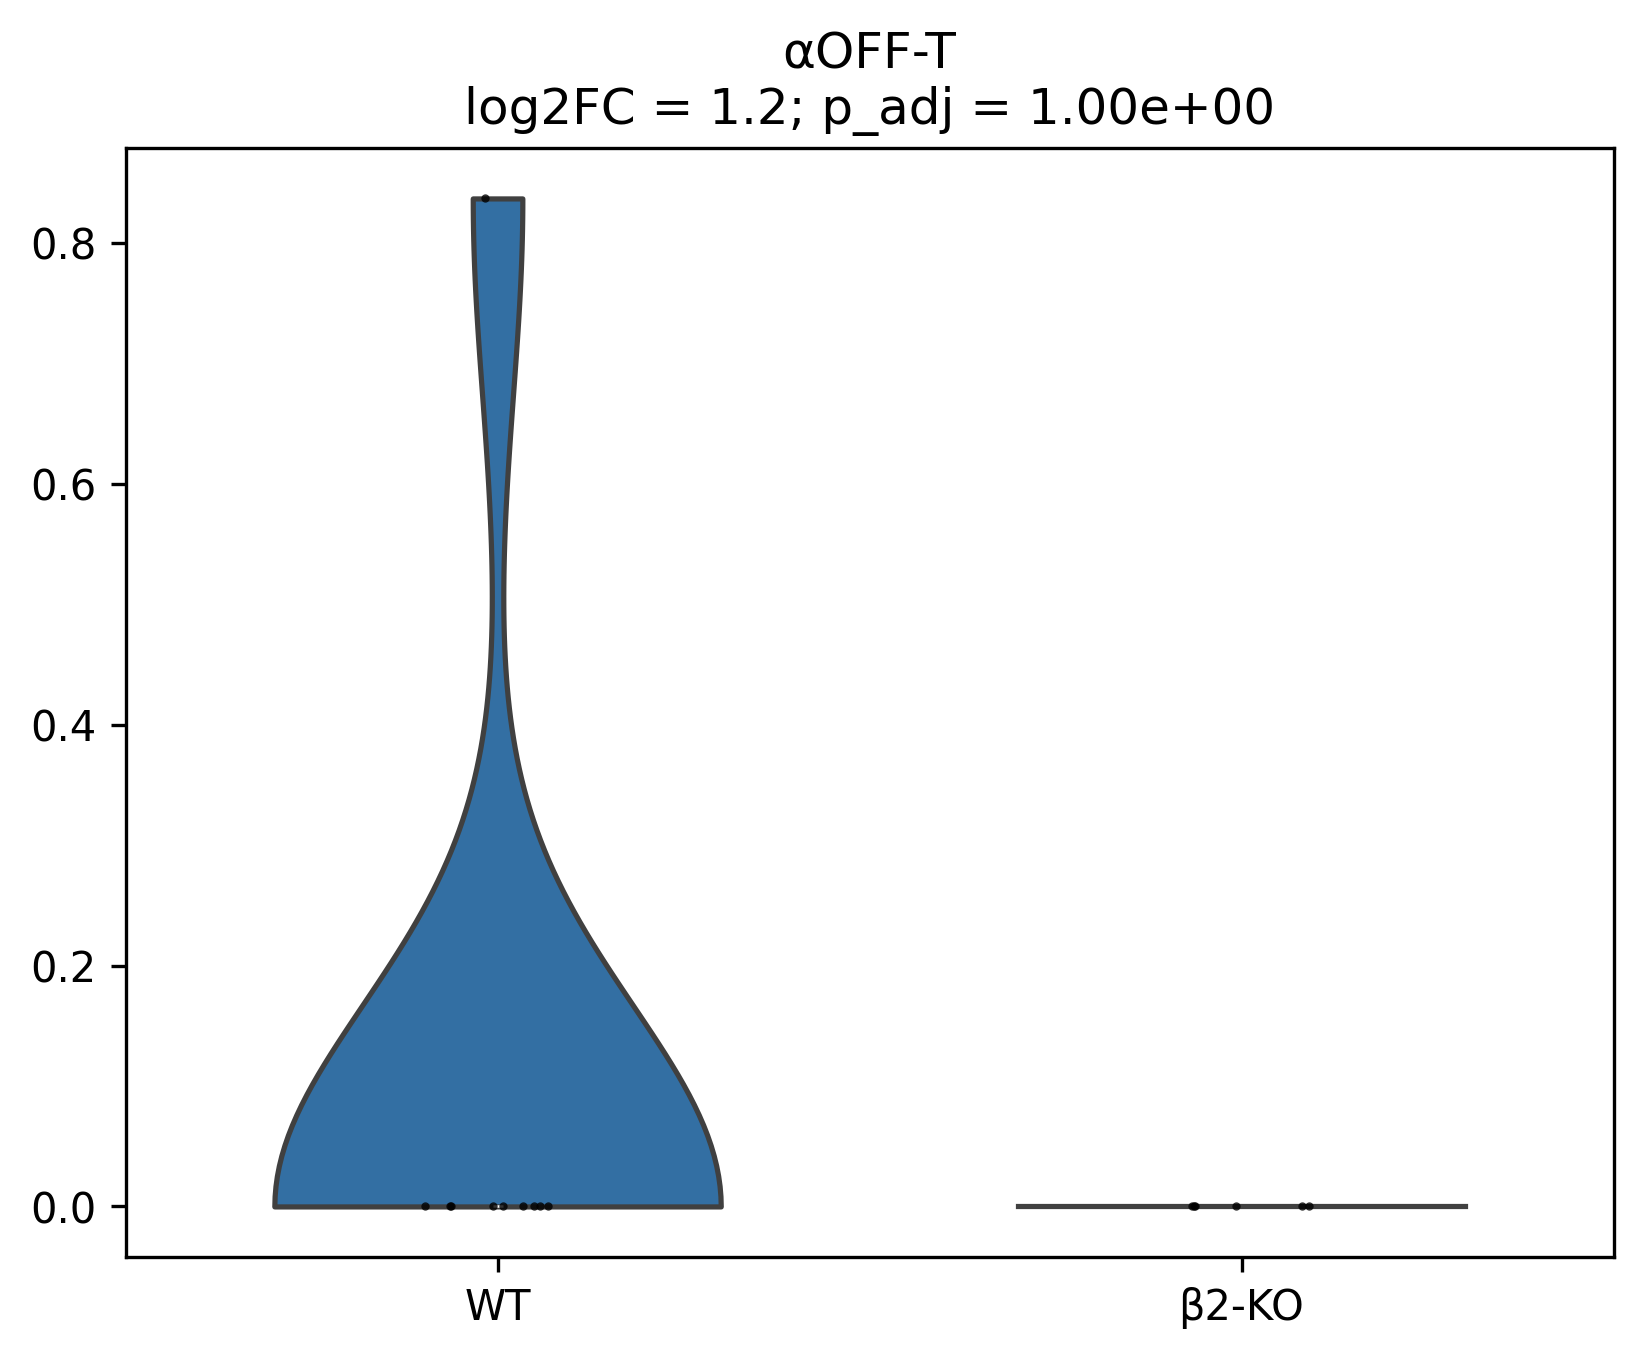

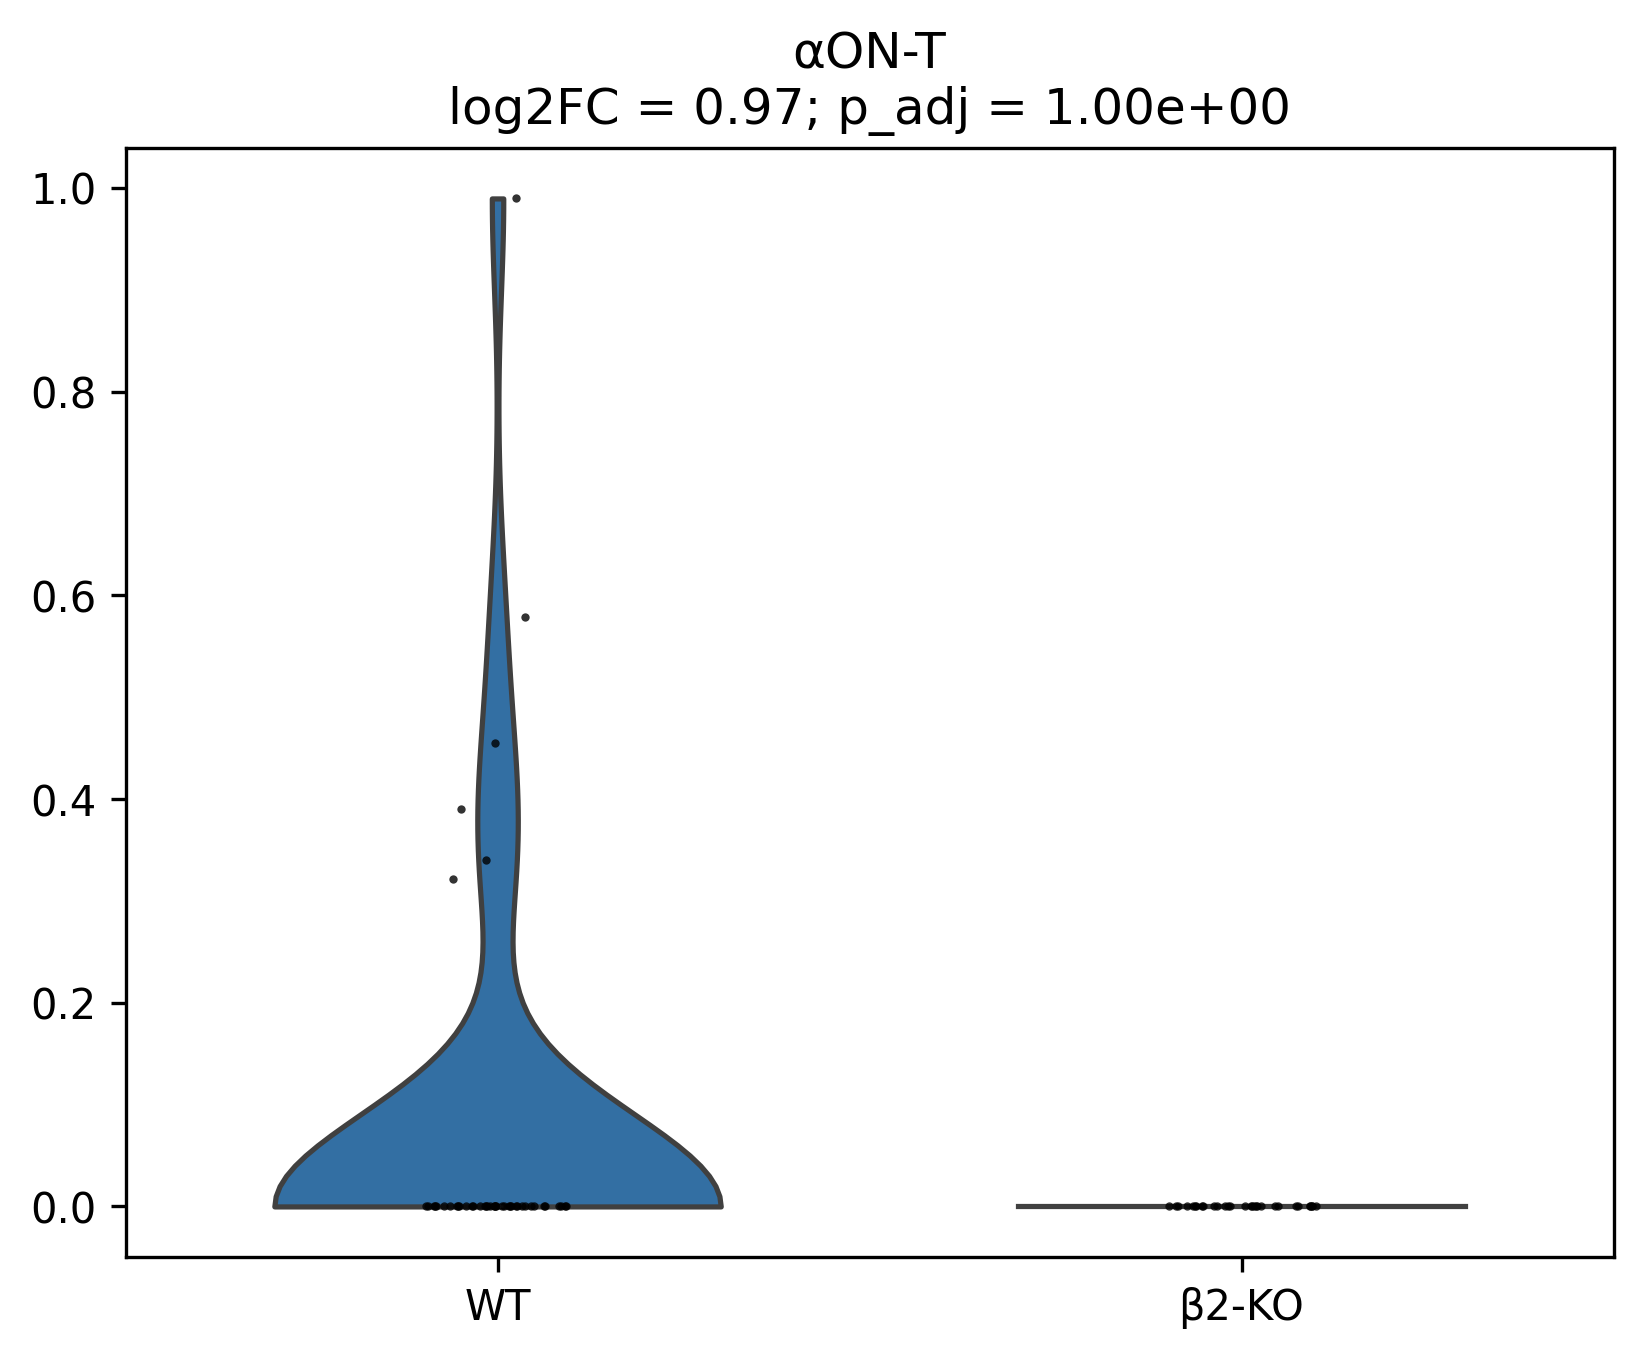

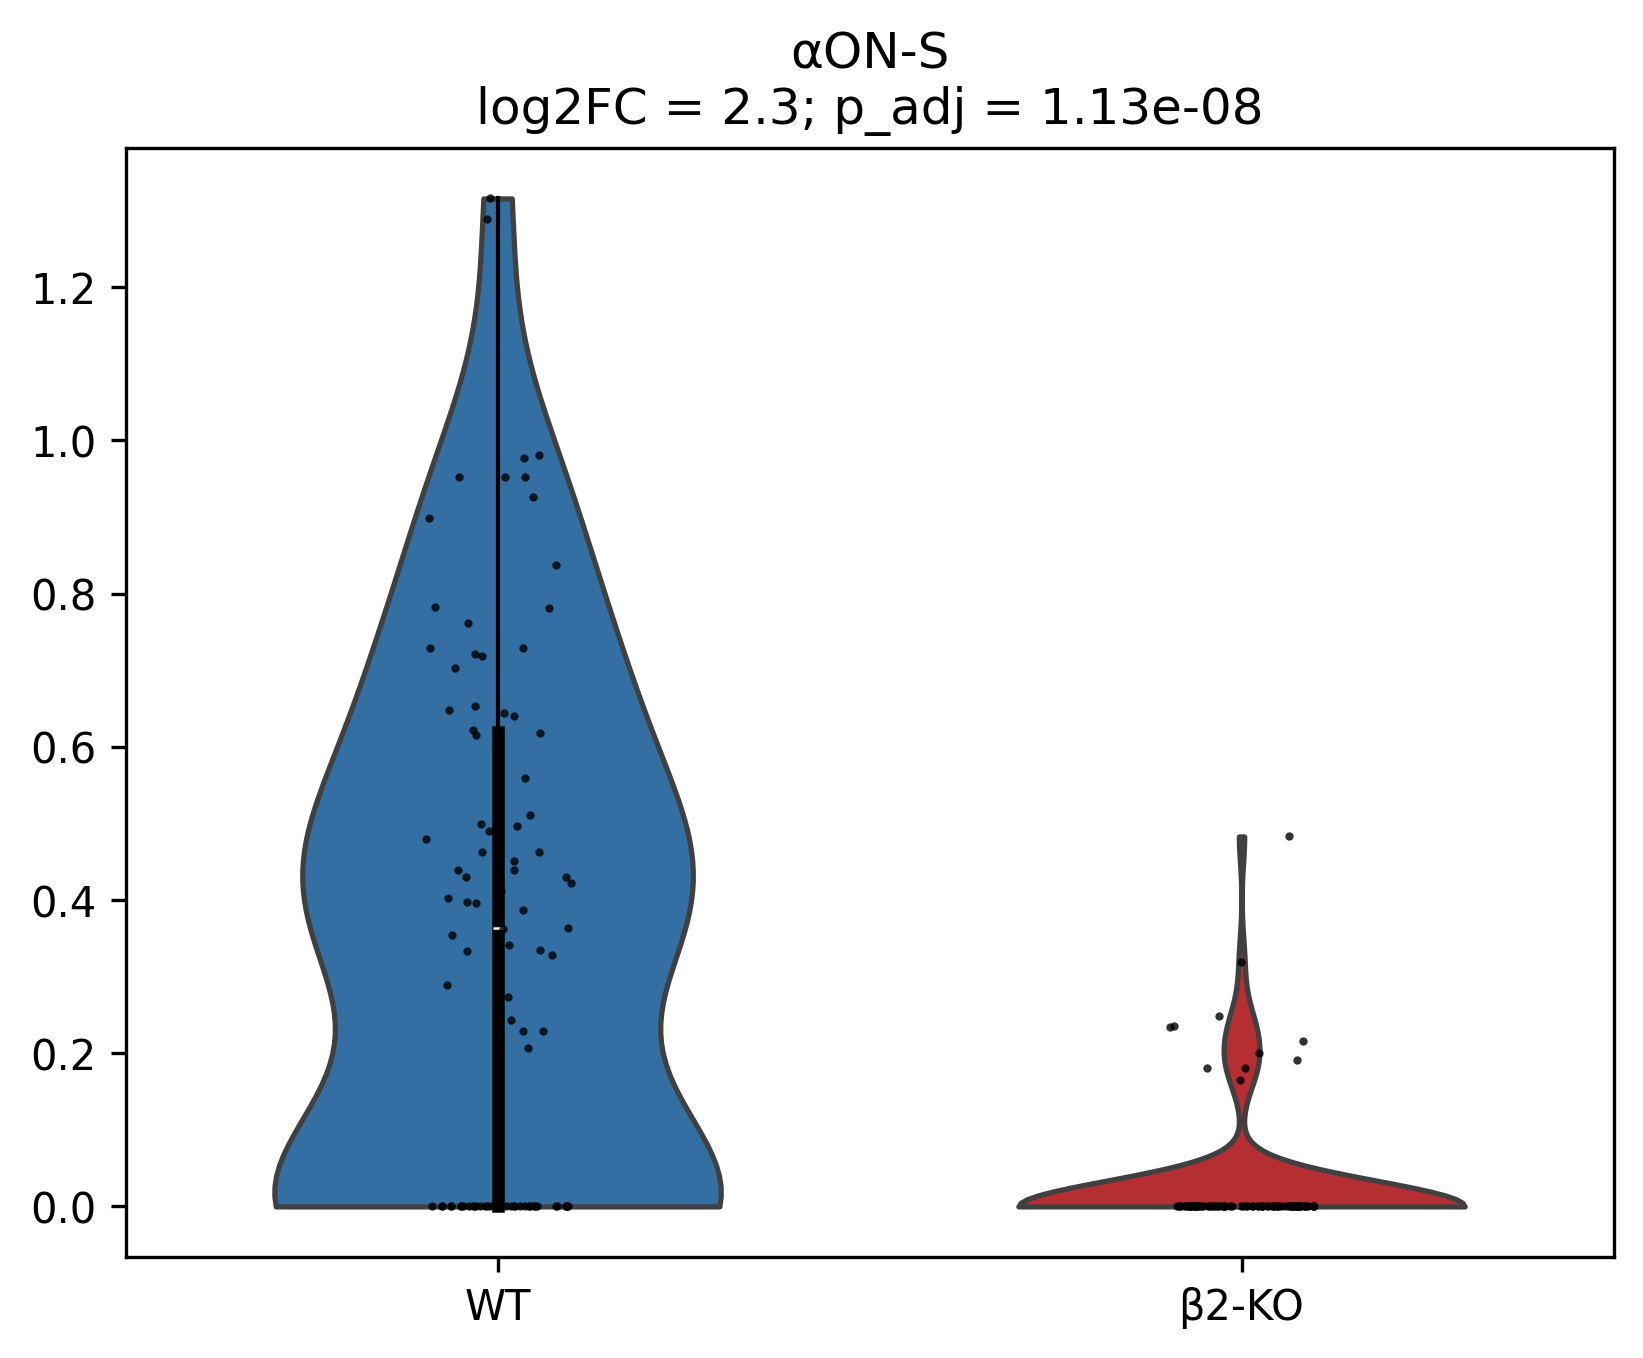

In [269]:
for i in [41, 44, 40, 42]:
    plt.figure()
    curr_adata = adata_combined_p7_type_list[i]
    sub_adata_p7 = curr_adata[curr_adata.obs['Condition'] == 'WT']
    sub_adata_p7b2 = curr_adata[curr_adata.obs['Condition'] == 'β2-KO']
    p7_mat = sub_adata_p7.raw[:, 'Kcnk9']
    p7b2_mat = sub_adata_p7b2.raw[:, 'Kcnk9']
    p7_list = [x[0] for x in p7_mat.X.toarray()]
    p7b2_list = [x[0] for x in p7b2_mat.X.toarray()]
    # print(np.mean(np.expm1(p7_list)))
    # print(np.mean(np.expm1(p7b2_list)))
    # print('LFC:', np.log2((np.mean(np.expm1(p7_list)+0.1))/(np.mean(np.expm1(p7b2_list))+0.1)))
    comb_dict = {'WT': p7_list, 'β2-KO': p7b2_list}
    sns.violinplot(comb_dict, palette=['#2171b5','#cb181d'], width=0.6, inner_kws=dict(box_width=3, color='black'), density_norm='width', cut=0)
    sns.stripplot(comb_dict, color='black', alpha=0.8, size=2)
    plt.title(dummy_list[i] + '\nlog2FC = ' + '{:0.2}'.format(np.log2(kcnk9_fcs_by_type[i])) + '; p_adj = ' + '{:0.2e}'.format(kcnk9_pvals_by_type[i]))
    plt.savefig(str(i) + '_alpha.svg')